# **Objective**

1.   Pick up a dataset
2.   Do some EDA on the data
3.   Apply traditional ML technique to predict outcome variable
4.   Use Bayesian Inference as an alternative technique to predict outcome variable
5.   Compare results of both methods


# **Libraries**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
import arviz as az
import pymc3 as pm
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


warnings.filterwarnings("ignore")

# **Functions**

In [ ]:
# performance metrics for classification datasets

def classification_metric(y_test, y_pred, y_pred_proba):

  # confusion matrix
  # cm = confusion_matrix(y_test, y_pred)
  print('--> Evaluation Metrics')
  # print('\tConfusion Matrix: ')
  # print('\t', cm)

  # accuracy
  print('\tAccuracy:\t', accuracy_score(y_test, y_pred))

  # precision
  if (len(np.unique(y_pred))>2):
    print('\tPrecision:\t', precision_score(y_test, y_pred, average='weighted'))
  else:
    print('\tPrecision:\t', precision_score(y_test, y_pred))

  # recall
  if (len(np.unique(y_pred))>2):
    print('\tRecall:\t\t', recall_score(y_test, y_pred, average='weighted'))
  else:
    print('\tRecall:\t\t', recall_score(y_test, y_pred))

  # AUC
  if (len(np.unique(y_pred))<=2):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    print('\tAUC:\t\t', roc_auc)

In [ ]:
# classification models definition

def classification_models(X_train, X_test, y_train, y_test):
  print('')
  print('--> (a) Model: Logistic Regression')
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:,1]
  classification_metric(y_test, y_pred, y_pred_proba)

  print('')
  print('--> (b) Model: Random Forest')
  clf = RandomForestClassifier(max_depth=2, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:,1]
  classification_metric(y_test, y_pred, y_pred_proba)

  print('')
  print('--> (c) Model: XGBoost')
  clf = XGBClassifier()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:,1]
  classification_metric(y_test, y_pred, y_pred_proba)

  print('')
  print('--> (d) Model: SVM')
  clf = svm.SVC(probability=True)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_proba = clf.predict_proba(X_test)[:,1]
  classification_metric(y_test, y_pred, y_pred_proba)

In [ ]:
def regression_models(X_train, X_test, y_train, y_test):
  print('')

  print('--> (a) Model: Linear Regression')
  LR = LinearRegression()
  LR.fit(X_train,y_train)
  y_prediction = LR.predict(X_test)
  score=r2_score(y_test,y_prediction)
  print('\n--> Evaluation Metrics')
  print('r2-score:\t', score)
  print('MSE:\t', mean_squared_error(y_test,y_prediction))
  print('RMSE:\t', np.sqrt(mean_squared_error(y_test,y_prediction)))

  print('\n\n--> (b) Model: VotingRegressor Regression')
  models = [('lr',DecisionTreeRegressor(max_depth=1)),('svm',DecisionTreeRegressor(max_depth=2))]
  ensemble = VotingRegressor(estimators=models)
  ensemble.fit(X_train, y_train)
  prediction = ensemble.predict(X_test)
  score=r2_score(y_test,prediction)
  print('\n--> Evaluation Metrics')
  print('r2-score:\t', score)
  print('MSE:\t', mean_squared_error(y_test,prediction))
  print('RMSE:\t', np.sqrt(mean_squared_error(y_test,prediction)))

# **Dataset 1 (Credit Card Fraud Detection)**

---


### **Importing Dataset(s)**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2/Project/creditcard.csv")
dataset1.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

### **Data Dictionary**

The datasets holds credit card transactional data for September 2013. There are 31 columns out of which our target variable is 'Class' holding value 1 (for Fraud) or 0 (otherwise). Features V1 to V28 are obtained after applying PCA and are provided in this way to maintain confidentiality of original dataset.

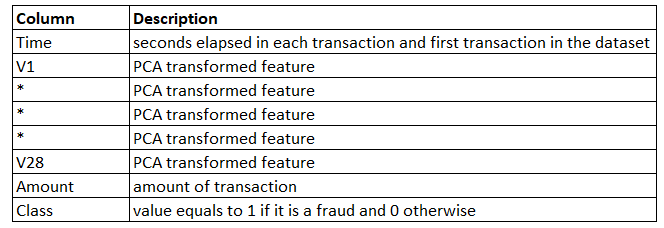

### **`Stage 1: EDA`**

EDA is performed to obtain a better understanding of data. Our aim is to identify:
  1.   important variables,
  2.   relationshiop between the variables, and
  3.   distribution of dataset

**Basic Info about dataset**

In [ ]:
shape = dataset1.shape
print('Shape: ',shape)



Shape:  (284807, 31)


Dataset has **284807 rows** and **31 columns**

In [ ]:
dataset1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are **no null values** in the dataset

In [ ]:
# check for duplicate rows

dataset1[dataset1.duplicated()]

Time        V1        V2  ...       V28  Amount  Class
33          26.0 -0.529912  0.873892  ...  0.023307    6.14      0
35          26.0 -0.535388  0.865268  ...  0.025427    1.77      0
113         74.0  1.038370  0.127486  ...  0.001192    1.18      0
114         74.0  1.038370  0.127486  ...  0.001192    1.18      0
115         74.0  1.038370  0.127486  ...  0.001192    1.18      0
...          ...       ...       ...  ...       ...     ...    ...
282987  171288.0  1.912550 -0.455240  ... -0.036020   11.99      0
283483  171627.0 -1.464380  1.368119  ...  0.119251    6.82      0
283485  171627.0 -1.457978  1.378203  ...  0.116772   11.93      0
284191  172233.0 -2.667936  3.160505  ... -0.222200   55.66      0
284193  172233.0 -2.691642  3.123168  ... -0.213020   36.74      0

[1081 rows x 31 columns]

There are **1081 duplicate rows**

In [ ]:
dataset1 = dataset1.drop_duplicates()
dataset1.shape

(283726, 31)

Duplicates are removed

In [ ]:
# show basic stats of numerical data
dataset1.describe()

Time             V1  ...         Amount          Class
count  283726.000000  283726.000000  ...  283726.000000  283726.000000
mean    94811.077600       0.005917  ...      88.472687       0.001667
std     47481.047891       1.948026  ...     250.399437       0.040796
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     54204.750000      -0.915951  ...       5.600000       0.000000
50%     84692.500000       0.020384  ...      22.000000       0.000000
75%    139298.000000       1.316068  ...      77.510000       0.000000
max    172792.000000       2.454930  ...   25691.160000       1.000000

[8 rows x 31 columns]

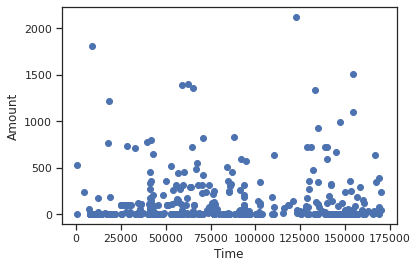

In [ ]:
plt.scatter(dataset1[dataset1["Class"]==1].Time,dataset1[dataset1["Class"]==1].Amount)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

The above **scatter** plot maps the relationship between **Amount** and **Time** for **Fraudulent cases**. We will see relationship between other variables as well after resampling

Class
0    283253
1       473
Name: Class, dtype: int64


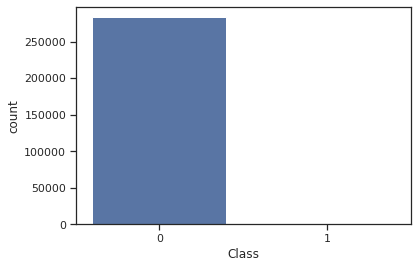

In [ ]:
descending_order = dataset1['Class'].value_counts().index
sns.countplot("Class", data = dataset1, order = descending_order)
# descending_order

print('Class')
print(dataset1['Class'].value_counts())

It can be seen that our target variable **Class** is **imbalanced** holding only **~0.17%** of share in the minority Class out of total. Our results won't be accurate as the distribution of values is skewed towards one class

To overcome this problem, I will use **undersampling technique** to undersample majority class by by reducing the sample size and making it equal to minority class

**Resampling**

I have done resampling to make classes balanced for both ML and MCMC methods as class imbalance would result in wrong results

In [ ]:
# undersampling

class_1_df = dataset1.loc[dataset1['Class']==1]
class_0_df = dataset1.loc[dataset1['Class'] == 0][:473]
combine_df = pd.concat([class_1_df, class_0_df])
dataset1_resampled = combine_df.sample(frac=1, random_state=42)
dataset1_resampled

Time         V1         V2  ...       V28   Amount  Class
154697  102625.0  -4.221221   2.871121  ... -0.599848     7.59      1
8842     12093.0  -4.696795   2.693867  ...  0.608075     0.00      1
354        260.0   1.026702  -0.661665  ...  0.016598    99.00      0
233258  147501.0  -1.611877  -0.408410  ... -0.009852   996.27      1
17317    28625.0 -27.848181  15.598193  ...  0.388090    99.99      1
...          ...        ...        ...  ...       ...      ...    ...
41395    40662.0  -4.446847  -0.014793  ...  0.971834     1.00      1
144108   85867.0  -3.586964   2.609127  ... -0.299728   310.42      1
394        285.0  -0.931805   1.527737  ...  0.090920     8.99      0
249239  154309.0  -0.082983  -3.935919  ...  0.126221  1096.99      1
33276    37167.0  -7.923891  -5.198360  ... -1.552593    12.31      1

[946 rows x 31 columns]

Class
1    473
0    473
Name: Class, dtype: int64


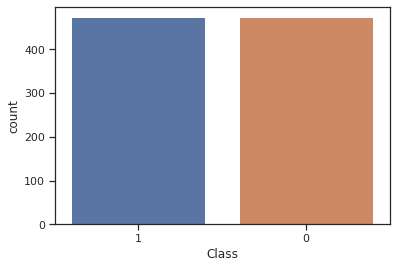

In [ ]:
descending_order = dataset1_resampled['Class'].value_counts().index
sns.countplot("Class", data = dataset1_resampled, order = descending_order)
# descending_order

print('Class')
print(dataset1_resampled['Class'].value_counts())

After resampling, we have **balanced classes** as shown above. Now we will use this resampled dataset for the rest of our script

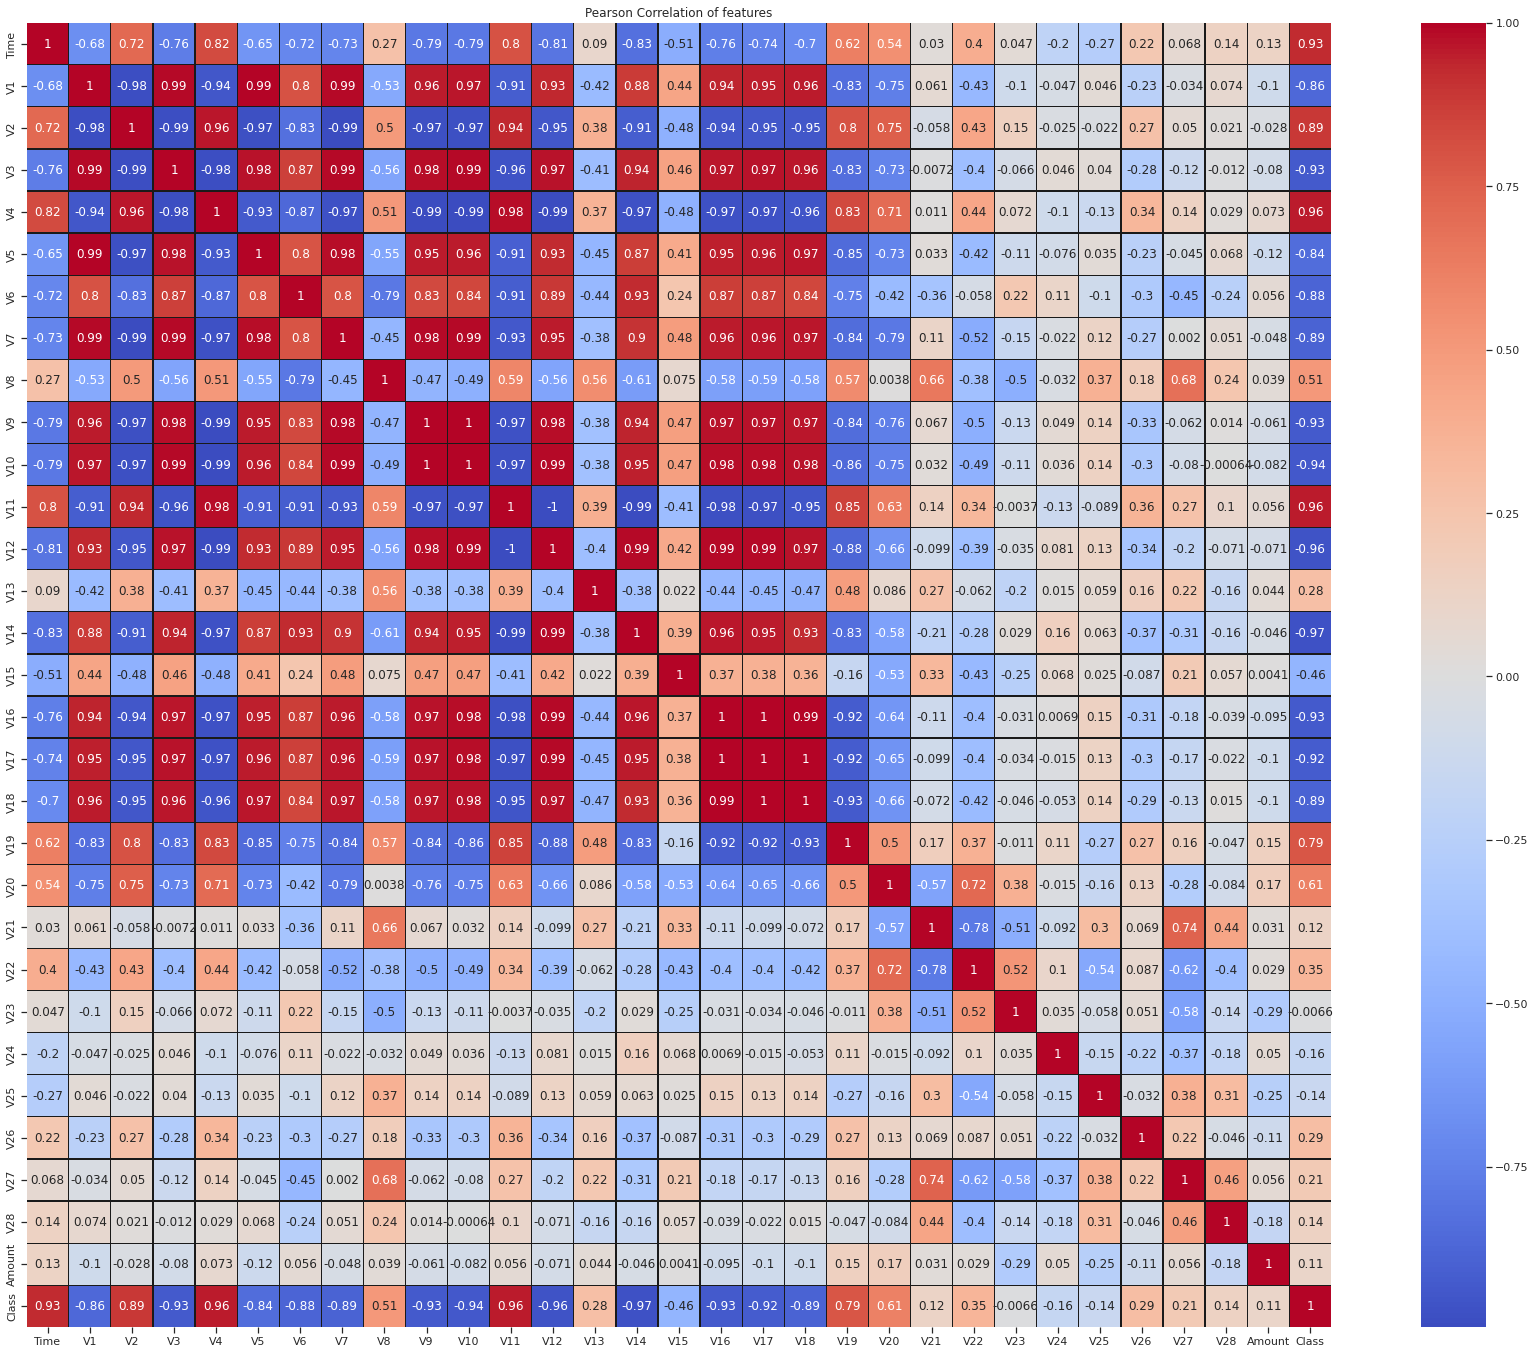

In [ ]:
corr_data = dataset1_resampled.corr()
       
f, ax = plt.subplots(figsize=(32, 24))
plt.title('Pearson Correlation of features')
sns.heatmap(corr_data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="coolwarm", linecolor='k', annot=True)

Following observations are taken from the above correlation:

*   some of the PCA transformed variables have a very high correlation between them
*   Features like Time,V2,V4,V11 have a **high positive correlation** with **Class (target variable)** indicating a positive linear relationship with outome
*   Features like V3,V9,V10,V12,V14,V16,V17 and V18 have a **high negative correlation** with **Class (target variable)** indicating a negative linear relationship with outome



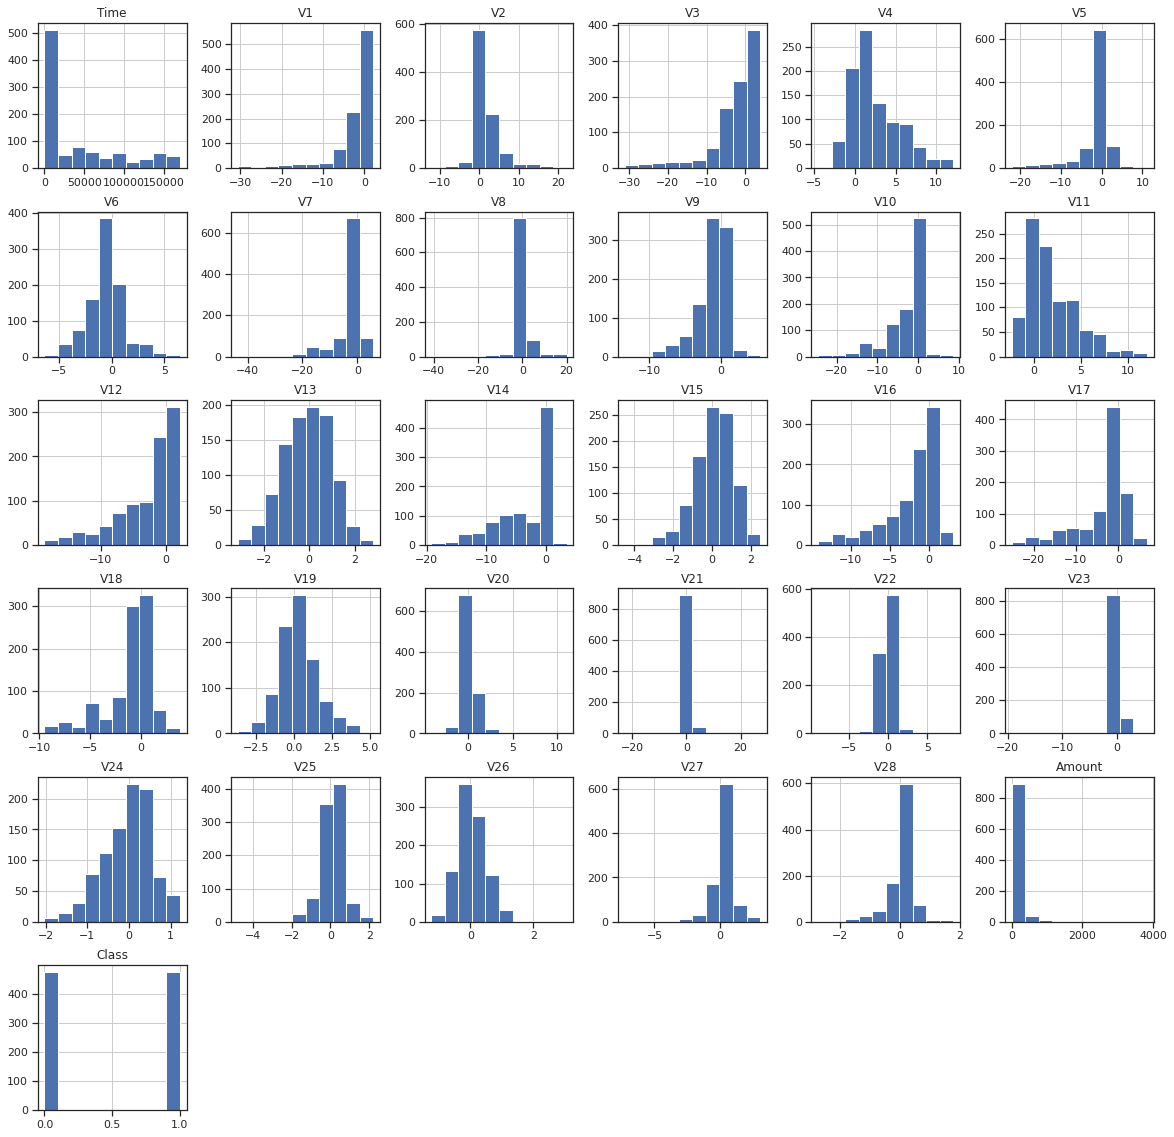

In [ ]:
dataset1_resampled.hist(figsize=(20,20))
plt.show()

The **histogram** above reflects to the distribution of each feature in the dataset

In [ ]:
# Feature Selection

# splitting data into data and labels and training and testing
print('splitting data into data and labels and training and testing...\n')
X = dataset1_resampled.iloc[:, :-1].values
Y = dataset1_resampled.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print('\n5 Best Features based on scores:\n')
Selector = SelectKBest(score_func=mutual_info_classif, k=5)
Selector.fit(X_train,Y_train)
scores = pd.DataFrame(Selector.scores_)
features = pd.DataFrame(dataset1_resampled.iloc[:, :-1].columns) 
featureScores = pd.concat([features,scores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(5,'Score'))  

splitting data into data and labels and training and testing...


5 Best Features based on scores:

   Feature     Score
0     Time  0.679139
10     V10  0.465932
12     V12  0.464732
14     V14  0.459766
3       V3  0.449230


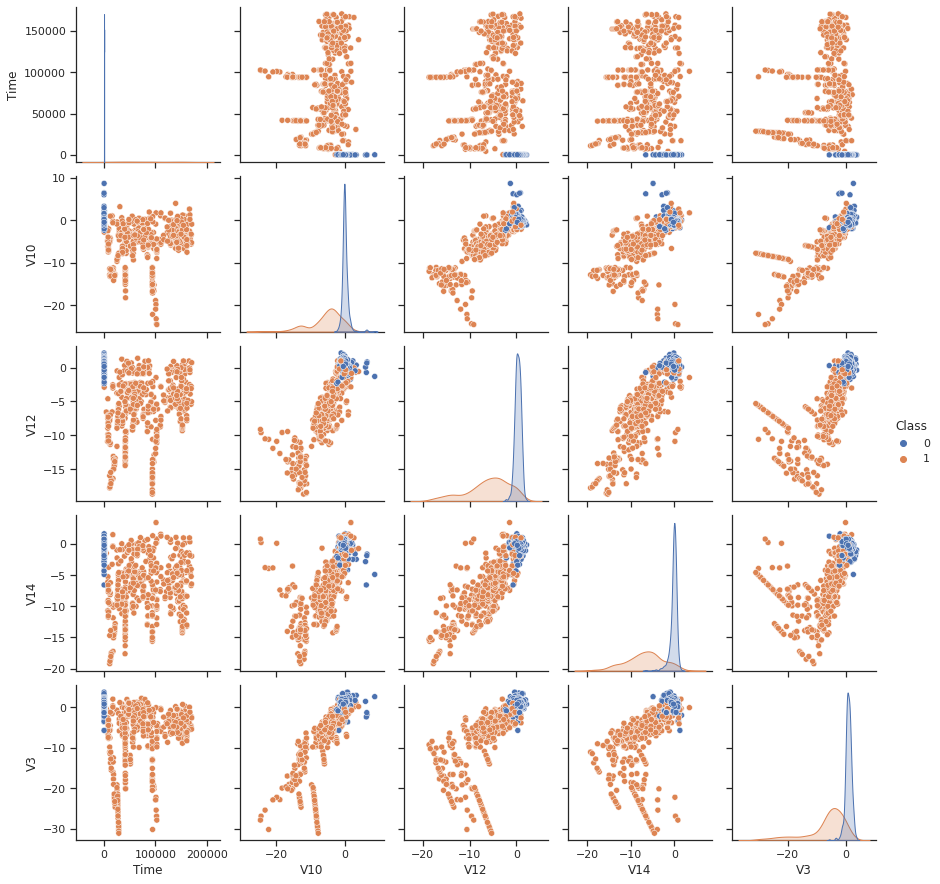

In [ ]:
sns.set(style="ticks")
sns.pairplot(dataset1_resampled[["Time","V10","V12","V14","V3","Class"]], hue="Class")

I have selected **two features (V10 and V12)** based on their pairplot distribution, feature importance and correlation

### **`Stage 2: Traditional ML (Applying ML Models)`**



```
I have picked up 4 Classification Models here:
  1.   Logistic Regression
  2.   Random Forest
  3.   XGBoost
  4.   SVM

```





In [ ]:
# spliiting data into train test splits
X = dataset1_resampled.iloc[:, :-1].values
y = dataset1_resampled.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
classification_models(X_train, X_test, y_train, y_test)


--> (a) Model: Logistic Regression
--> Evaluation Metrics
	Accuracy:	 0.9964788732394366
	Precision:	 0.9929078014184397
	Recall:		 1.0
	AUC:		 1.0

--> (b) Model: Random Forest
--> Evaluation Metrics
	Accuracy:	 0.9471830985915493
	Precision:	 0.9921259842519685
	Recall:		 0.9
	AUC:		 0.9981646825396825

--> (c) Model: XGBoost
--> Evaluation Metrics
	Accuracy:	 1.0
	Precision:	 1.0
	Recall:		 1.0
	AUC:		 1.0

--> (d) Model: SVM
--> Evaluation Metrics
	Accuracy:	 0.9964788732394366
	Precision:	 1.0
	Recall:		 0.9928571428571429
	AUC:		 1.0


The models seems to give score on classification models where all of the **30 features** are given input to the model

### **`Stage 3: Bayesian Inference Methods (MCMC)`**


Bayesian analysis allows us to update our beliefs (prior) about the parameters by using the results of an experiment (likelihood), which in other words mean that we are computing posterior distrbution with the help of prior and likelihood

Here, we want to estimate the model parameters and identify what distribution they are following. Our aim to sample from set of parameters that fit our data very well . Now that we have the data, we will further set prior, likelihood functions to find out posterior distribution that will gives us estimate of results

**Prior, Likelihood and Posterior**


**Prior** is the all about expressing the belief about data without looking at the actual data. We can say that it is an uninformative guess taken as a distribution

**Likelihood** is the function or distribution that is taken from data by observing values of data 

Posterior distribution is estimated with the help of prior and likelihood


In [ ]:
y_mcmc_data = dataset1_resampled['Class'].values
x_features = ['V10','V12']
x_mcmc_data = dataset1_resampled[x_features].values

We picked up **two features** from EDA above i.e V10 and V12. These two features will be given to our model and posterior distribution will be estimated based on that model

In [ ]:
print('splitting data into data and labels and training and testing...\n')
X_train, X_test, y_train, y_test = train_test_split(x_mcmc_data, y_mcmc_data, test_size=0.3, random_state=0)

splitting data into data and labels and training and testing...



**Model Parameters**

Since we are using a binary classification problem where we want to get posterior distribution by correctly identifying our prior and likelihood functions

It is important to select the right prior for our data in order to reflect the actual posterior distribution which is assumed to be similar to our prior belief. For this reason, we will use **conjucate prior** which means our prior will belong to the same distribution family of posterior. We observed in the EDA that our data seemed to follow normal distribution so we chose Normal distribution for our prior but since we have a binary class as output i.e 0 or 1 so we picked bernoulli distribution as correctly reflecting our likelihood function

'bd' is the decision boundary here which takes in all the parameters of the model. In the later section we will plot our decision boundary to visualize results

In [ ]:
with pm.Model() as model_g:
  # define priors
  alpha = pm.Normal('alpha', mu=0, sd=10)
  beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_features))

  x_train = pm.Data('input_cols', X_train)
  mu = alpha + pm.math.dot(x_train, beta)
  theta = theta = 1 / (1 + pm.math.exp(-mu))
  bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_train[:,0])

  # define likelihood
  yl = pm.Bernoulli('yl', p=theta, observed=y_train)
  trace_g = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 32 seconds.


Text(0, 0.5, 'V12')

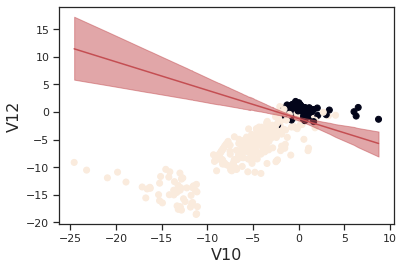

In [ ]:
idx = np.argsort(X_train[:,0])
ld = trace_g['bd'].mean(0)[idx]
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot(X_train[:,0][idx], ld, color='r');

ld_hpd = az.hdi(trace_g['bd'])[idx]
plt.fill_between(X_train[:,0][idx], ld_hpd[:,0], ld_hpd[:,1], color='r', alpha=0.5);

plt.xlabel(x_features[0], fontsize=16)
plt.ylabel(x_features[1], fontsize=16)

The plot of **decision boundary** above shows that by using these two features, we getting a good distinction of classes

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47250deb90>,
      dtype=object)

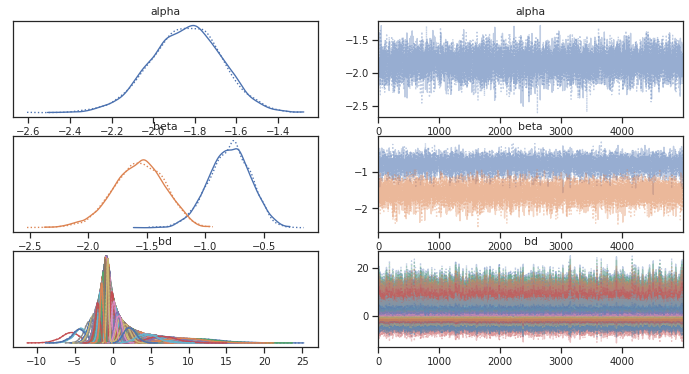

In [ ]:
model_params = ['alpha','beta','bd']
az.plot_trace(trace_g, model_params)

**trace plot** is used to check for the convergence of MCMC. We can see Kernel Density Estimation (KDE) on the left and on the right, we can see individual sampled values at each step. 

In [ ]:
az.summary(trace_g, model_params)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
alpha   -1.844  0.170  -2.147   -1.507  ...    0.001   10182.0    7297.0    1.0
beta[0] -0.795  0.180  -1.134   -0.465  ...    0.001   11044.0    7303.0    1.0
beta[1] -1.569  0.222  -1.983   -1.167  ...    0.002    9443.0    6844.0    1.0
bd[0]    0.633  0.398  -0.105    1.383  ...    0.003   12314.0    6980.0    1.0
bd[1]    2.408  0.828   0.887    3.954  ...    0.006   12564.0    6739.0    1.0
...        ...    ...     ...      ...  ...      ...       ...       ...    ...
bd[657] -1.463  0.218  -1.876   -1.077  ...    0.001   11844.0    7582.0    1.0
bd[658] -0.667  0.157  -0.976   -0.386  ...    0.001   11537.0    7854.0    1.0
bd[659]  4.620  1.378   2.120    7.209  ...    0.009   12649.0    6944.0    1.0
bd[660]  2.318  0.806   0.837    3.826  ...    0.006   12558.0    6697.0    1.0
bd[661] -1.504  0.226  -1.913   -1.086  ...    0.002   11900.0    7394.0    1.0

[665 rows x 9 columns]

We can also see the above summary visually by generating a plot with the mean and Highest Posterior Density (HPD) of a distribution, and to interpret and report the results of a Bayesian inference.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47231b6750>,
      dtype=object)

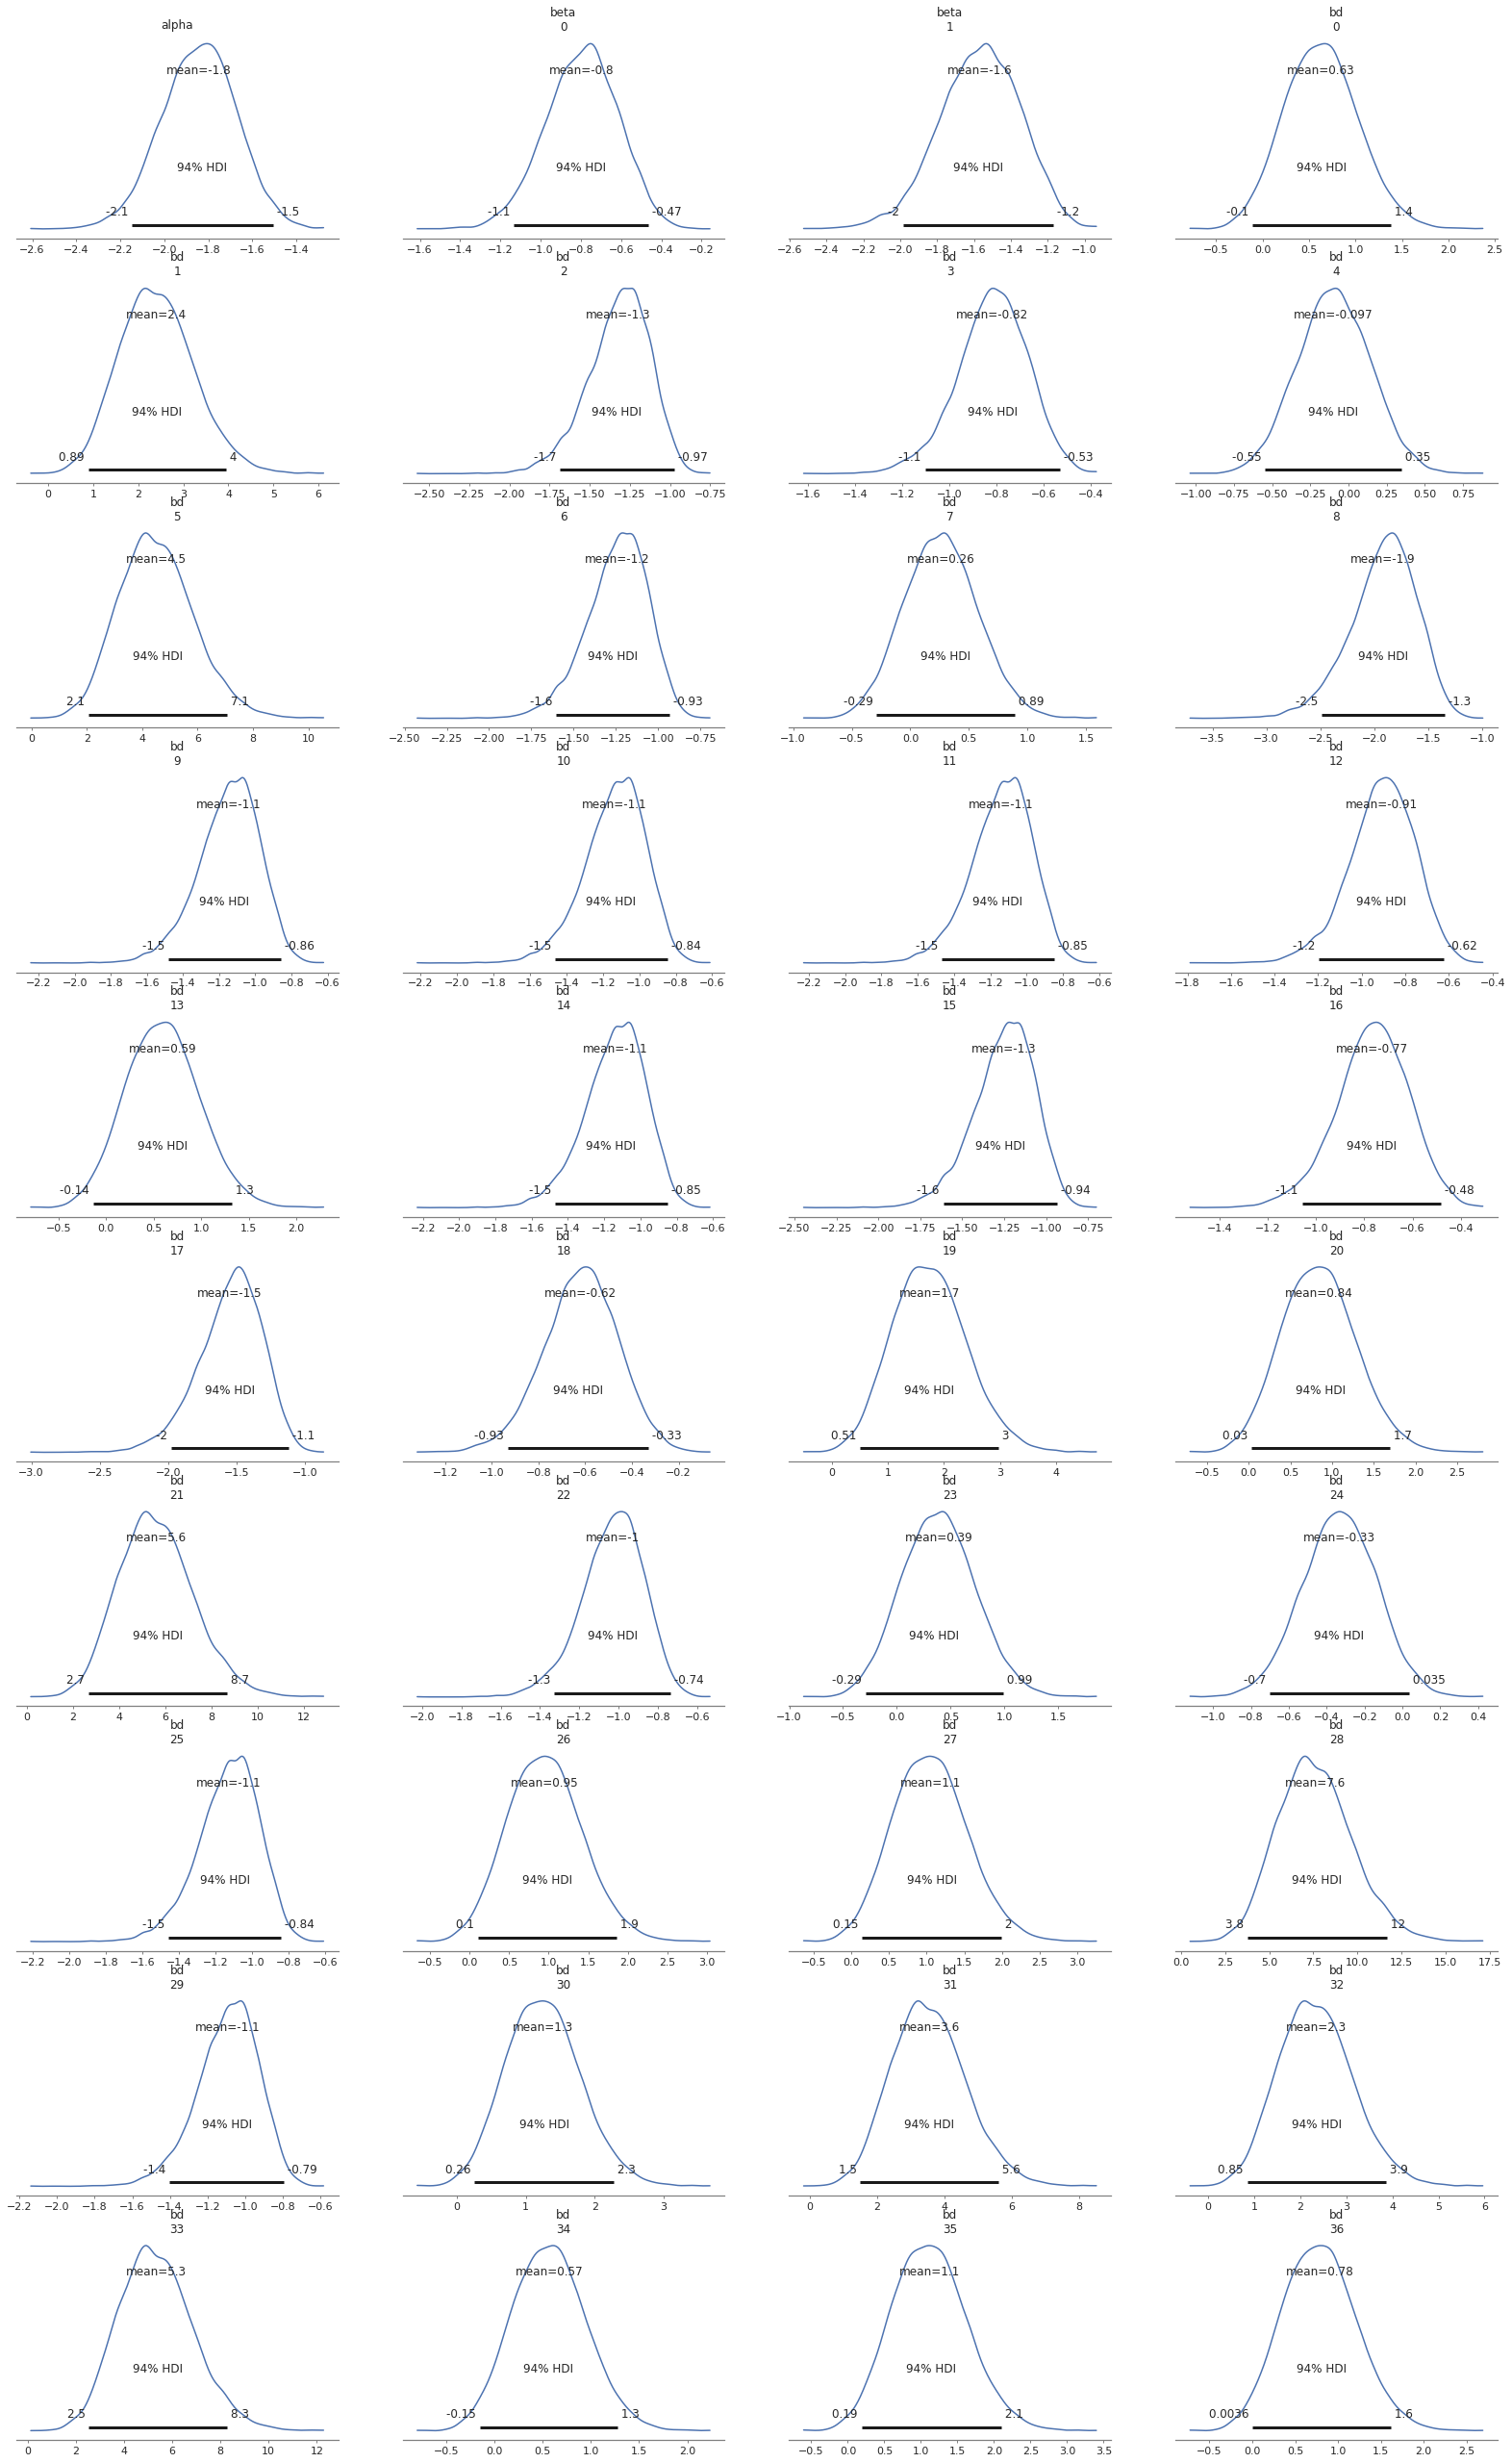

In [ ]:
az.plot_posterior(trace_g)

In [ ]:
az.rhat(trace_g)

Got error No model on context stack. trying to find log_likelihood in translation.


<xarray.Dataset>
Dimensions:     (bd_dim_0: 662, beta_dim_0: 2)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1
  * bd_dim_0    (bd_dim_0) int64 0 1 2 3 4 5 6 7 ... 655 656 657 658 659 660 661
Data variables:
    alpha       float64 0.9999
    beta        (beta_dim_0) float64 1.001 1.0
    bd          (bd_dim_0) float64 1.0 1.001 1.0 1.0 ... 1.0 1.001 1.001 1.0

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


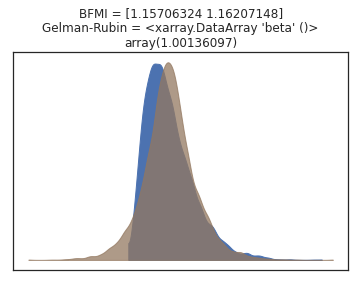

In [ ]:
bfmi = pm.bfmi(trace_g)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_g).values())
(pm.energyplot(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

**The Gelman Rubin** graph shows that our results have converged quite well as the statistics looks fine

**Posterior Predictive Checks**

*   PPCs are used to validate a model. The idea is to generate data from the model using parameters from draws from the posterior.
*   After computing posterior, we will now illustrate how simulation results can derive predictions
* prediction will be generated from test data which is unseen. This is done to compare with conventional ML technqiue

In [ ]:
X_test_df = pd.DataFrame(X_test)
with model_g:
  pm.set_data({'input_cols': X_test_df})
  posterior = pm.sample_posterior_predictive(trace_g)

preds = posterior['yl'].mean(axis=0)
ppc = pm.sample_posterior_predictive(trace_g, model=model_g, samples=1000)
y_pred = np.rint(ppc['yl'].mean(axis=0)).astype('int')

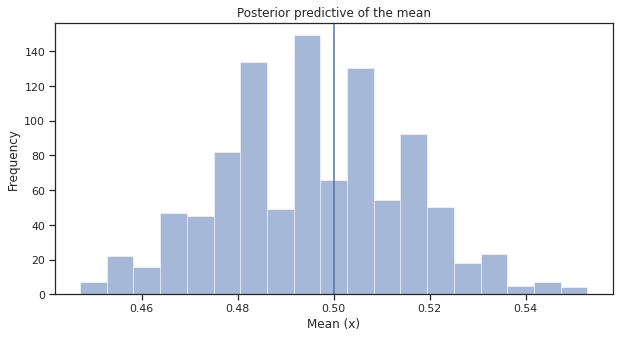

In [ ]:

_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['yl']], bins=19, alpha=0.5)
ax.axvline(dataset1_resampled.Class.mean())
ax.set(title='Posterior predictive of the mean', xlabel='Mean (x)', ylabel='Frequency');

It is visible from the plot above that our posterior mean aligns closely to our actual mean

**Evaluation of MCMC results**

In [ ]:
print('Accuracy:', accuracy_score(y_pred, y_test))
print('f1 score', f1_score(y_pred, y_test))

Accuracy: 0.9190140845070423
f1 score 0.9125475285171102


We got a pretty good accuracy by just using **2 variables** i.e **~92%**

### **`Stage 4: Comparison of Both Methods`**


*   MCMC methods are comparatively **slower** than ML
*   However, it yields good accuracy of **~92%** by using just **2 variables** where on the other hand we used **30 variables** as input to the ML models and they gave us **~99%**







# **Dataset 2 (Kaggle Sales Dataset)** 

---

### **Importing Dataset(s)**

Dataset contains a set of products in which we are trying to determine which products we should continue to sell, and which products to remove from our inventory. The file contains BOTH historical sales data AND active inventory, which can be discerned with the column titled "File Type".

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2/Project/SalesKaggle3.csv")
df_SoldFlag = dataset2['SoldFlag']
del dataset2['SoldFlag']
dataset2['SoldFlag'] = df_SoldFlag
dataset2.head()

Order   File_Type  SKU_number  ...  LowUserPrice LowNetPrice  SoldFlag
0      2  Historical     1737127  ...         28.97       31.84       0.0
1      3  Historical     3255963  ...          0.00       15.54       0.0
2      4  Historical      612701  ...         30.19       27.97       0.0
3      6  Historical      115883  ...        133.93       83.15       1.0
4      7  Historical      863939  ...          4.00       23.99       1.0

[5 rows x 14 columns]

### **`Stage 1: EDA`**

EDA is performed to obtain a better understanding of data. Our aim is to identify:
  1.   important variables,
  2.   relationshiop between the variables, and
  3.   distribution of dataset

**Basic Info about dataset**

In [ ]:
shape = dataset2.shape
print('Shape: ',shape)



Shape:  (198917, 14)


Dataset has **198917 rows** and **14 columns**

In [ ]:
dataset2.describe()

Order    SKU_number  ...    LowNetPrice      SoldFlag
count  198917.000000  1.989170e+05  ...  198917.000000  75996.000000
mean   106483.543242  8.613626e+05  ...      46.832053      0.171009
std     60136.716784  8.699794e+05  ...     128.513236      0.376519
min         2.000000  5.000100e+04  ...       0.000000      0.000000
25%     55665.000000  2.172520e+05  ...      17.950000      0.000000
50%    108569.000000  6.122080e+05  ...      33.980000      0.000000
75%    158298.000000  9.047510e+05  ...      55.490000      0.000000
max    208027.000000  3.960788e+06  ...   19138.790000      1.000000

[8 rows x 12 columns]

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldCount         75996 non-null   float64
 4   MarketingType     198917 non-null  object 
 5   ReleaseNumber     198917 non-null  int64  
 6   New_Release_Flag  198917 non-null  int64  
 7   StrengthFactor    198917 non-null  float64
 8   PriceReg          198917 non-null  float64
 9   ReleaseYear       198917 non-null  int64  
 10  ItemCount         198917 non-null  int64  
 11  LowUserPrice      198917 non-null  float64
 12  LowNetPrice       198917 non-null  float64
 13  SoldFlag          75996 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [ ]:
dataset2.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
SoldFlag            122921
dtype: int64

Need to apply some data cleaning by fixing some column's data types and also by dropping some columns that we will not use in our analysis

In [ ]:
dataset2['SoldFlag'] = dataset2['SoldFlag'].astype('bool')
dataset2['New_Release_Flag'] = dataset2['New_Release_Flag'].astype('bool')
dataset2.drop(['Order','SoldCount'], inplace=True, axis=1) 

In [ ]:
dataset2.isnull().sum()

File_Type           0
SKU_number          0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
SoldFlag            0
dtype: int64

There are **no null values** in the dataset

In [ ]:
# check for duplicate rows

dataset2[dataset2.duplicated()]

Empty DataFrame
Columns: [File_Type, SKU_number, MarketingType, ReleaseNumber, New_Release_Flag, StrengthFactor, PriceReg, ReleaseYear, ItemCount, LowUserPrice, LowNetPrice, SoldFlag]
Index: []

There are **no duplicate rows**

I have used the information provided with the dataset to split train and test set based on their **file type** i.e **historical** as training data and **active** as testing data

In [ ]:
df_train = dataset2[dataset2['File_Type'] == 'Historical']
df_train.drop('File_Type', inplace=True, axis=1) 
df_test = dataset2[dataset2['File_Type'] == 'Active']
df_test.drop('File_Type', inplace=True, axis=1) 

In [ ]:
dataset2.head()

File_Type  SKU_number MarketingType  ...  LowUserPrice  LowNetPrice  SoldFlag
0  Historical     1737127             D  ...         28.97        31.84     False
1  Historical     3255963             D  ...          0.00        15.54     False
2  Historical      612701             D  ...         30.19        27.97     False
3  Historical      115883             D  ...        133.93        83.15      True
4  Historical      863939             D  ...          4.00        23.99      True

[5 rows x 12 columns]

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   File_Type         198917 non-null  object 
 1   SKU_number        198917 non-null  int64  
 2   MarketingType     198917 non-null  object 
 3   ReleaseNumber     198917 non-null  int64  
 4   New_Release_Flag  198917 non-null  bool   
 5   StrengthFactor    198917 non-null  float64
 6   PriceReg          198917 non-null  float64
 7   ReleaseYear       198917 non-null  int64  
 8   ItemCount         198917 non-null  int64  
 9   LowUserPrice      198917 non-null  float64
 10  LowNetPrice       198917 non-null  float64
 11  SoldFlag          198917 non-null  bool   
dtypes: bool(2), float64(4), int64(4), object(2)
memory usage: 15.6+ MB


Lets divide **categorical** and **continuous** variables for ease of analysis

In [ ]:
categorical = ['File_Type', 'SoldFlag', 'ReleaseNumber', 'New_Release_Flag', 'ReleaseYear', 'MarketingType']
numerical = ['ReleaseNumber', 'StrengthFactor', 'PriceReg', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

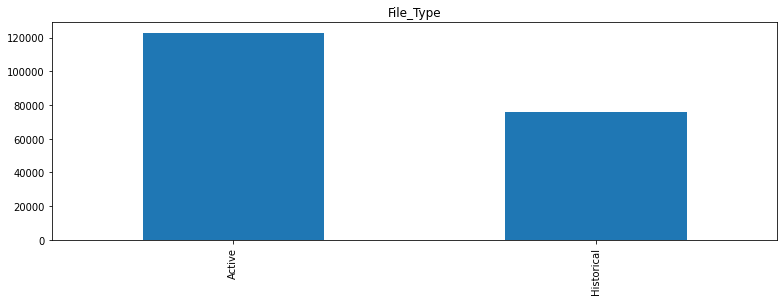

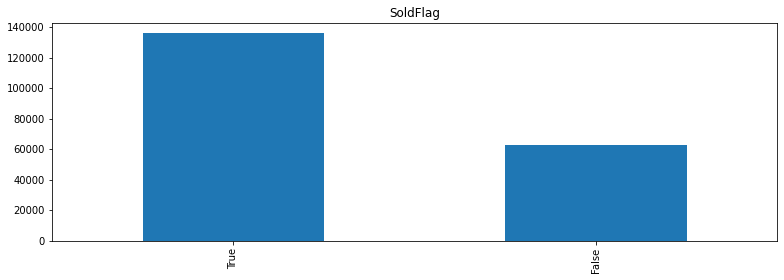

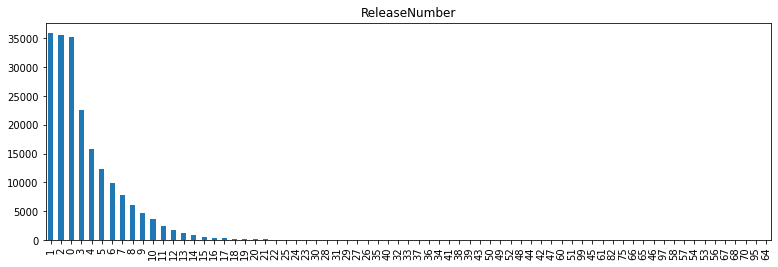

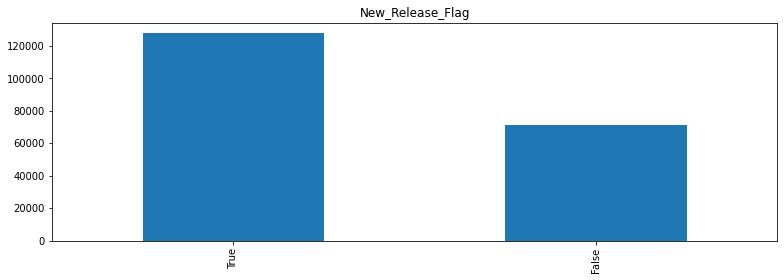

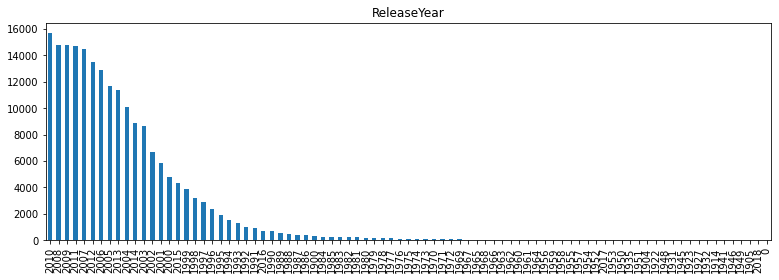

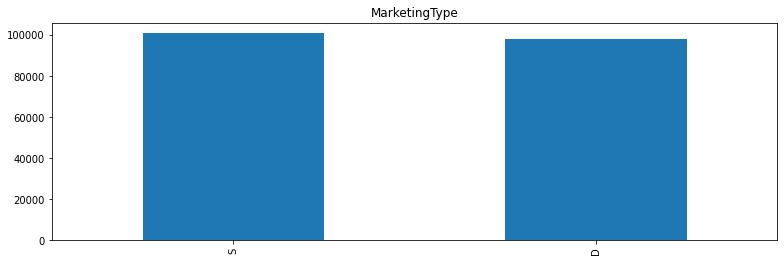

In [ ]:
for col in categorical :
    dataset2[col].value_counts().plot(kind='bar',figsize=(13,4))
    plt.title(col)
    plt.show()

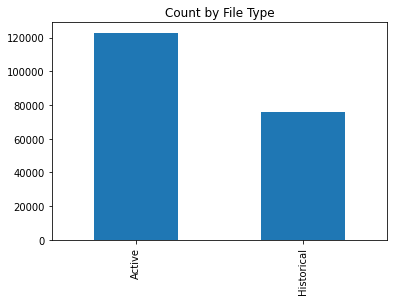

In [ ]:
dataset2['File_Type'].value_counts().plot.bar(title="Count by File Type")

Distribution of values can be seen in the above analysis

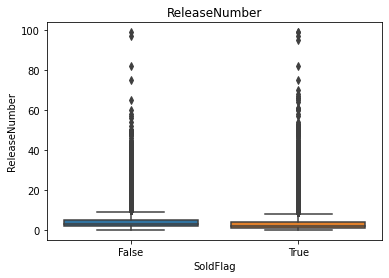

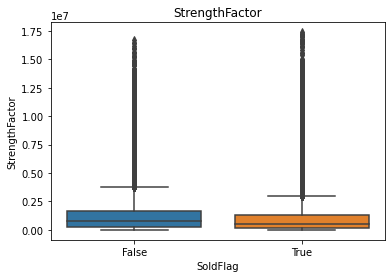

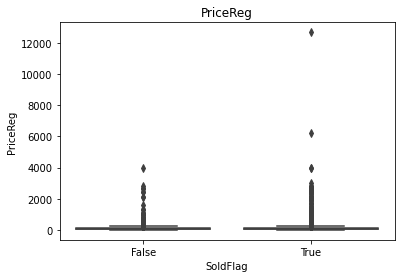

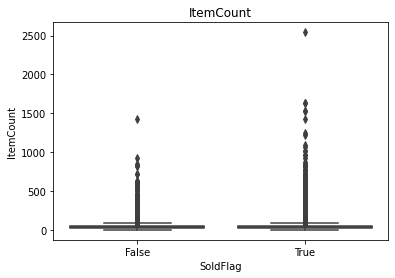

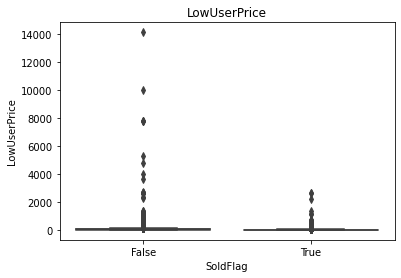

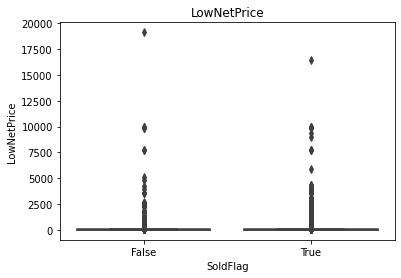

In [ ]:
for col in numerical :
    # dataset2[col].value_counts().plot(kind='bar',figsize=(13,4))
    sns.boxplot(x='SoldFlag', y=col, data=dataset2);
    plt.title(col)
    plt.show()

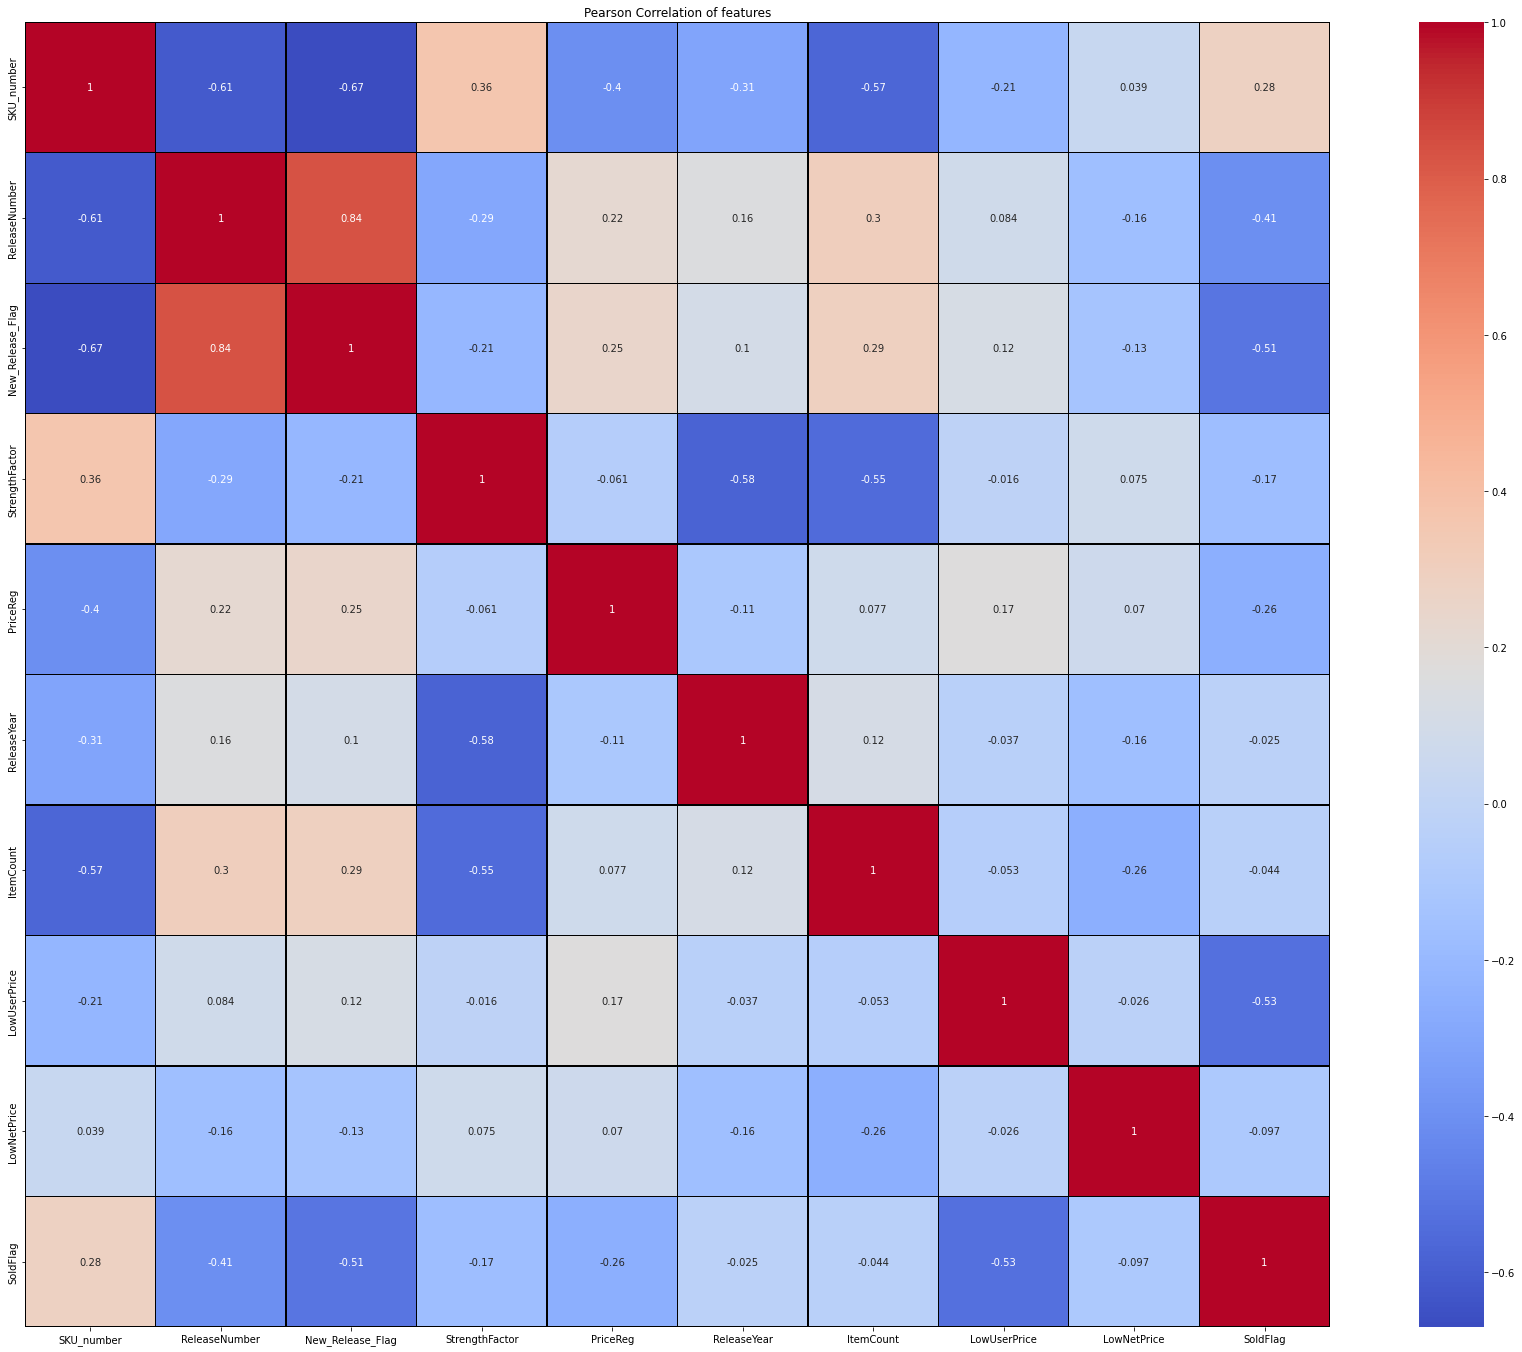

In [ ]:
corr_data = dataset2.corr()
       
f, ax = plt.subplots(figsize=(32, 24))
plt.title('Pearson Correlation of features')
sns.heatmap(corr_data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="coolwarm", linecolor='k', annot=True)

Based on the above correlation plot, we will pick two most prominent features for MCMC methods. The coorelation does not seems to have produced good results

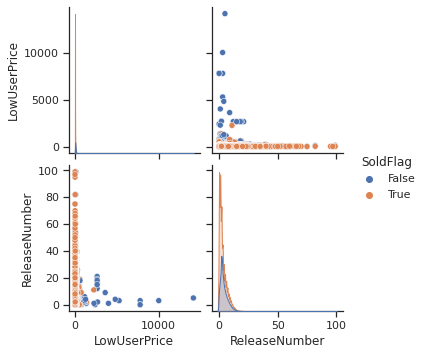

In [ ]:
sns.set(style="ticks")
sns.pairplot(dataset2[["LowUserPrice","ReleaseNumber","SoldFlag"]], hue="SoldFlag")

The above plot shows SoldFlag wise variance on diagonals

### **`Stage 2: Traditional ML (Applying ML Models)`**



```
I have picked up 4 Classification Models here:
  1.   Logistic Regression
  2.   Random Forest
  3.   XGBoost
  4.   SVM

```





For ease of model building we will quickly pick only numerical features and ignore cateogorical features for now for ML models and limit our data

In [ ]:
dataset2_filtered = dataset2[numerical]
dataset2_filtered['SoldFlag'] = dataset2['SoldFlag']

In [ ]:
dataset2_filtered.head()

ReleaseNumber  StrengthFactor  PriceReg  ...  LowUserPrice  LowNetPrice  SoldFlag
0             15        682743.0     44.99  ...         28.97        31.84     False
1              7       1016014.0     24.81  ...          0.00        15.54     False
2              0        340464.0     46.00  ...         30.19        27.97     False
3              4        334011.0    100.00  ...        133.93        83.15      True
4              2       1287938.0    121.95  ...          4.00        23.99      True

[5 rows x 7 columns]

In [ ]:
# spliting data into train test splits
X = dataset2_filtered.iloc[:, :-1].values
y = dataset2_filtered.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
classification_models(X_train, X_test, y_train, y_test)


--> (a) Model: Logistic Regression
--> Evaluation Metrics
	Accuracy:	 0.6880320396809437
	Precision:	 0.6883775811209439
	Recall:		 0.9968267916422574
	AUC:		 0.498000589340692

--> (b) Model: Random Forest
--> Evaluation Metrics
	Accuracy:	 0.7632381526911991
	Precision:	 0.7659380511682289
	Recall:		 0.9434192540519429
	AUC:		 0.83117757819043

--> (c) Model: XGBoost
--> Evaluation Metrics
	Accuracy:	 0.840807024599504
	Precision:	 0.8693774063292328
	Recall:		 0.9039250146455771
	AUC:		 0.9008992243125806

--> (d) Model: SVM


Best results from classification models was given by XGBoost with **~84%** accuracy.

### **`Stage 3: Bayesian Inference Methods (MCMC)`**

In [ ]:
y_mcmc_data = dataset2_filtered['SoldFlag'].values
x_features = ['LowUserPrice','ReleaseNumber']
x_mcmc_data = dataset2_filtered[x_features].values

In [ ]:
print('splitting data into data and labels and training and testing...\n')
X_train, X_test, y_train, y_test = train_test_split(x_mcmc_data, y_mcmc_data, test_size=0.3, random_state=0)

splitting data into data and labels and training and testing...



**Model Parameters**


In [ ]:
with pm.Model() as model_g:
  # define priors
  alpha = pm.Normal('alpha', mu=0, sd=10)
  beta = pm.Normal('beta', mu=0, sd=20, shape=len(x_features))

  x_train = pm.Data('input_cols', X_train)
  mu = alpha + pm.math.dot(x_train, beta)
  theta = theta = 1 / (1 + pm.math.exp(-mu))
  bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_train[:,0])

  # define likelihood
  yl = pm.Bernoulli('yl', p=theta, observed=y_train)
  trace_g = pm.sample(1000,init="adapt_diag")

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 889 seconds.


In [ ]:
with pm.Model() as model_g:
  # define priors
  alpha = pm.Normal('alpha', mu=0, sd=10)
  beta = pm.Normal('beta', mu=0, sd=20, shape=len(x_features))

  x_train = pm.Data('input_cols', X_train)
  mu = alpha + pm.math.dot(x_train, beta)
  theta = theta = 1 / (1 + pm.math.exp(-mu))
  bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_train[:,0])

  # define likelihood
  yl = pm.Bernoulli('yl', p=theta, observed=y_train)
  trace_g = pm.sample(1000,init="adapt_diag")

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1030 seconds.


NUTS with jitter threw error of 'mass diagonals equal to zero'.

With adapt_diag enabled, NUTS changed the (diagonal) mass matrix during tuning to match the variance of the posterior samples so that it does not break in between 

Text(0, 0.5, 'ReleaseNumber')

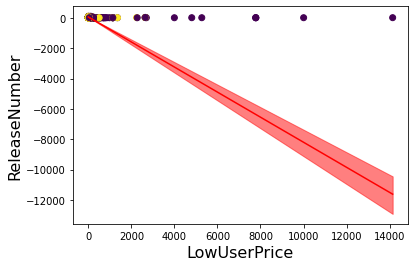

In [ ]:
idx = np.argsort(X_train[:,0])
ld = trace_g['bd'].mean(0)[idx]
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot(X_train[:,0][idx], ld, color='r');

ld_hpd = az.hdi(trace_g['bd'])[idx]
plt.fill_between(X_train[:,0][idx], ld_hpd[:,0], ld_hpd[:,1], color='r', alpha=0.5);

plt.xlabel(x_features[0], fontsize=16)
plt.ylabel(x_features[1], fontsize=16)

The plot of **decision boundary** above is not looking very effective here

In [ ]:
model_params = ['alpha','beta','bd']
az.plot_trace(trace_g, model_params)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


**trace plot** is used to check for the convergence of MCMC. We can see Kernel Density Estimation (KDE) on the left and on the right, we can see individual sampled values at each step. 

In [ ]:
az.summary(trace_g, model_params)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
alpha        1.662  0.011   1.644    1.683  ...    0.000    1074.0    1033.0   1.00
beta[0]     -0.025  0.000  -0.025   -0.024  ...    0.000    1282.0    1180.0   1.00
beta[1]     -0.030  0.002  -0.033   -0.027  ...    0.000    1155.0    1284.0   1.01
bd[0]       15.018  0.640  13.958   16.330  ...    0.013    1247.0    1354.0   1.00
bd[1]       52.094  2.618  47.129   56.814  ...    0.054    1205.0    1302.0   1.00
...            ...    ...     ...      ...  ...      ...       ...       ...    ...
bd[139236]  24.582  1.131  22.597   26.718  ...    0.023    1207.0    1337.0   1.00
bd[139237]   6.741  0.320   6.137    7.325  ...    0.006    1671.0    1409.0   1.01
bd[139238]  26.116  1.212  23.984   28.419  ...    0.025    1204.0    1320.0   1.00
bd[139239]  51.747  2.599  46.819   56.434  ...    0.054    1201.0    1302.0   1.00
bd[139240]  18.566  0.817  17.100   20.133  ...    0.017    1223.0    1318.0   1.00

[139244 rows x 9 columns]

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00070866d0>,
      dtype=object)

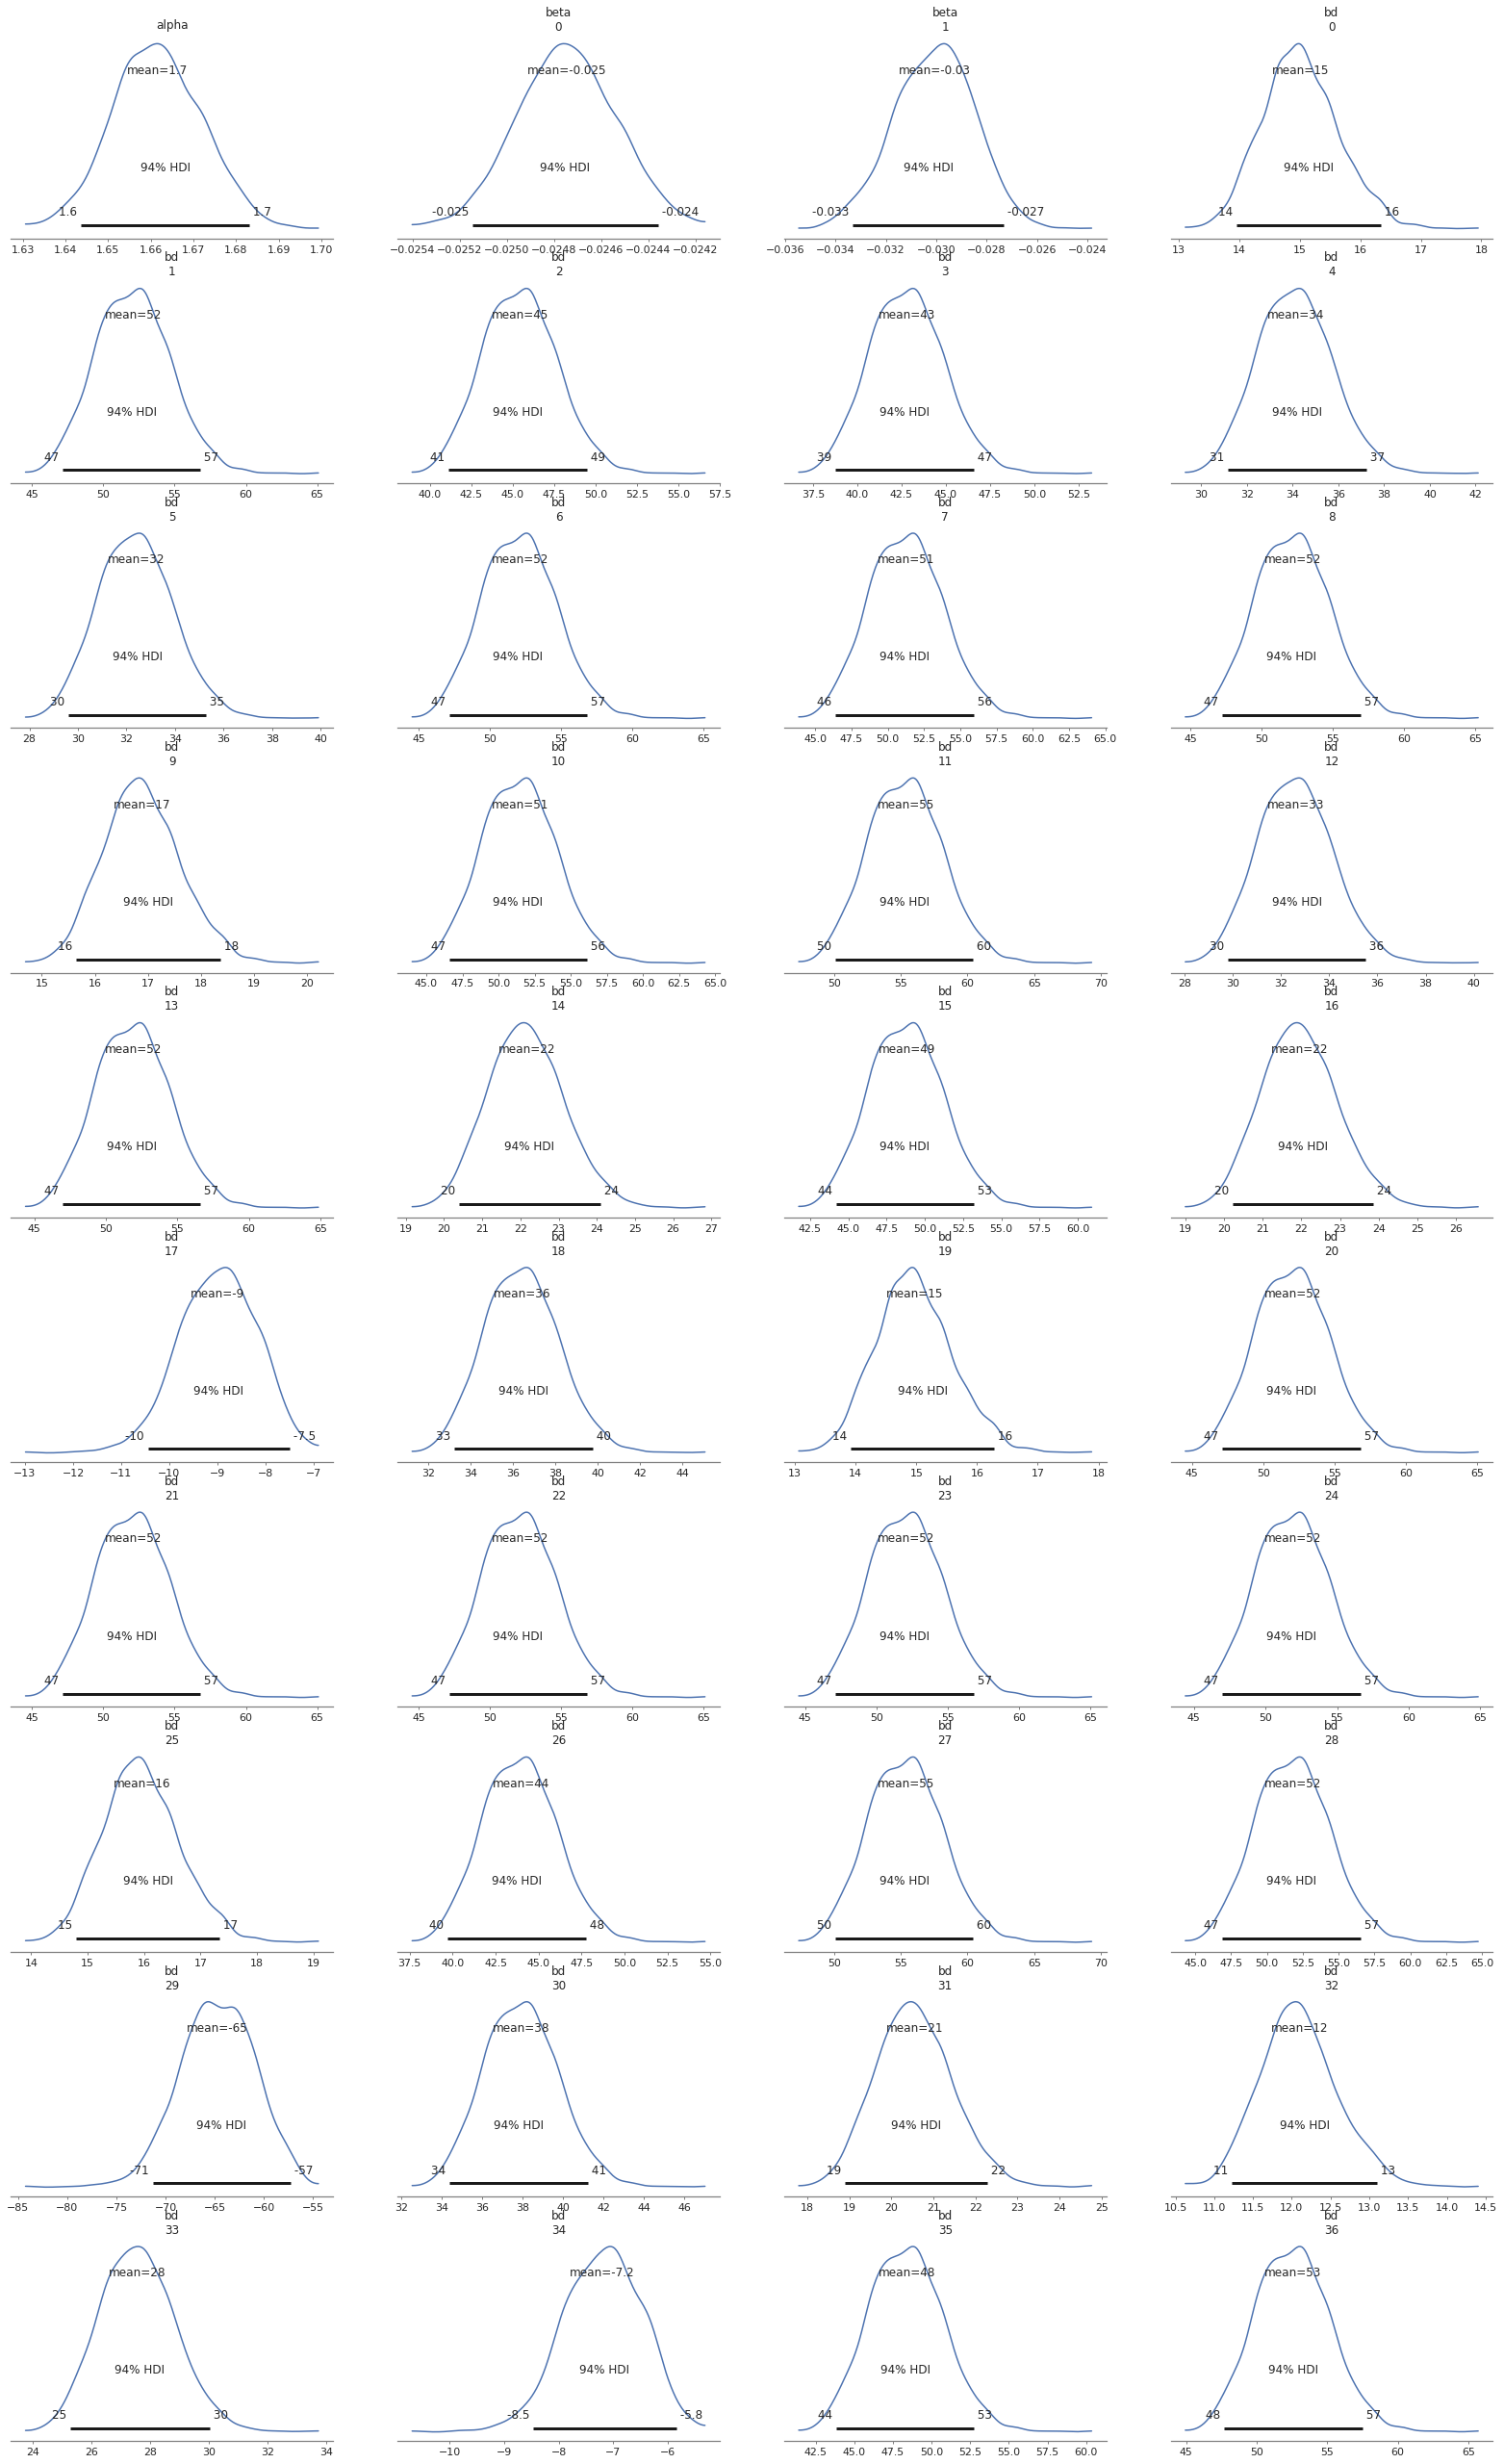

In [ ]:
az.plot_posterior(trace_g)

In [ ]:
az.rhat(trace_g)

Got error No model on context stack. trying to find log_likelihood in translation.


<xarray.Dataset>
Dimensions:     (bd_dim_0: 139241, beta_dim_0: 2)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1
  * bd_dim_0    (bd_dim_0) int64 0 1 2 3 4 ... 139237 139238 139239 139240
Data variables:
    alpha       float64 1.002
    beta        (beta_dim_0) float64 1.001 1.005
    bd          (bd_dim_0) float64 1.003 1.004 1.004 1.004 ... 1.003 1.004 1.003

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


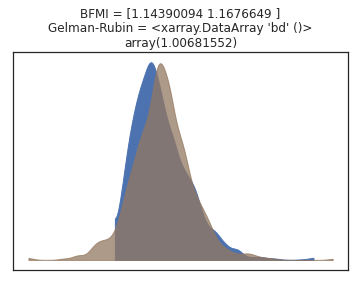

In [ ]:
bfmi = pm.bfmi(trace_g)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_g).values())
(pm.energyplot(trace_g, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

Good convergence can be observed from the plots above

**Posterior Predictive Checks**

*   PPCs are used to validate a model. The idea is to generate data from the model using parameters from draws from the posterior.
*   After computing posterior, we will now illustrate how simulation results can derive predictions
* prediction will be generated from test data which is unseen. This is done to compare with conventional ML technqiue

In [ ]:
X_test_df = pd.DataFrame(X_test)
with model_g:
  pm.set_data({'input_cols': X_test_df})
  posterior = pm.sample_posterior_predictive(trace_g)

preds = posterior['yl'].mean(axis=0)
ppc = pm.sample_posterior_predictive(trace_g, model=model_g, samples=1000)
y_pred = np.rint(ppc['yl'].mean(axis=0)).astype('int')

In [ ]:
print('Accuracy:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))

Accuracy: 0.7451404249614585
f1-score: 0.8348086761016196


MCMC method has produced **~75%** accuracy by using only two features

### **`Stage 4: Comparison of Both Methods`**

ML model **XGBoost** presented best results with **~84** accuracy score using 13 features, however, MCMC method used only 2 features and produced **~75** accuracy score. This is very close to actual results and supports our idea of using **MCMC** method as an alternative technqiue to conventional ML modeling techniques

# **Dataset 3 (Super Conductivity)**

---

### **Importing Dataset(s)**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML2/Project/super_conductivity.csv")
dataset3.head()

number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
0                   4         88.944468  ...         0.437059           29.0
1                   5         92.729214  ...         0.468606           26.0
2                   4         88.944468  ...         0.444697           19.0
3                   4         88.944468  ...         0.440952           22.0
4                   4         88.944468  ...         0.428809           23.0

[5 rows x 82 columns]

The goal here is to predict the **critical temperature** based on the features extracted

**Basic Info about Data**

The dataset contains **81 features** extracted from **21263 superconductors** along with the critical temperature. The goal here is to predict the **critical temperature** based on the features extracted

### **`Stage 1: EDA`**

In [ ]:
dataset3.shape

(21263, 82)

The super conductivity data has **21263 rows** and **82 columns**

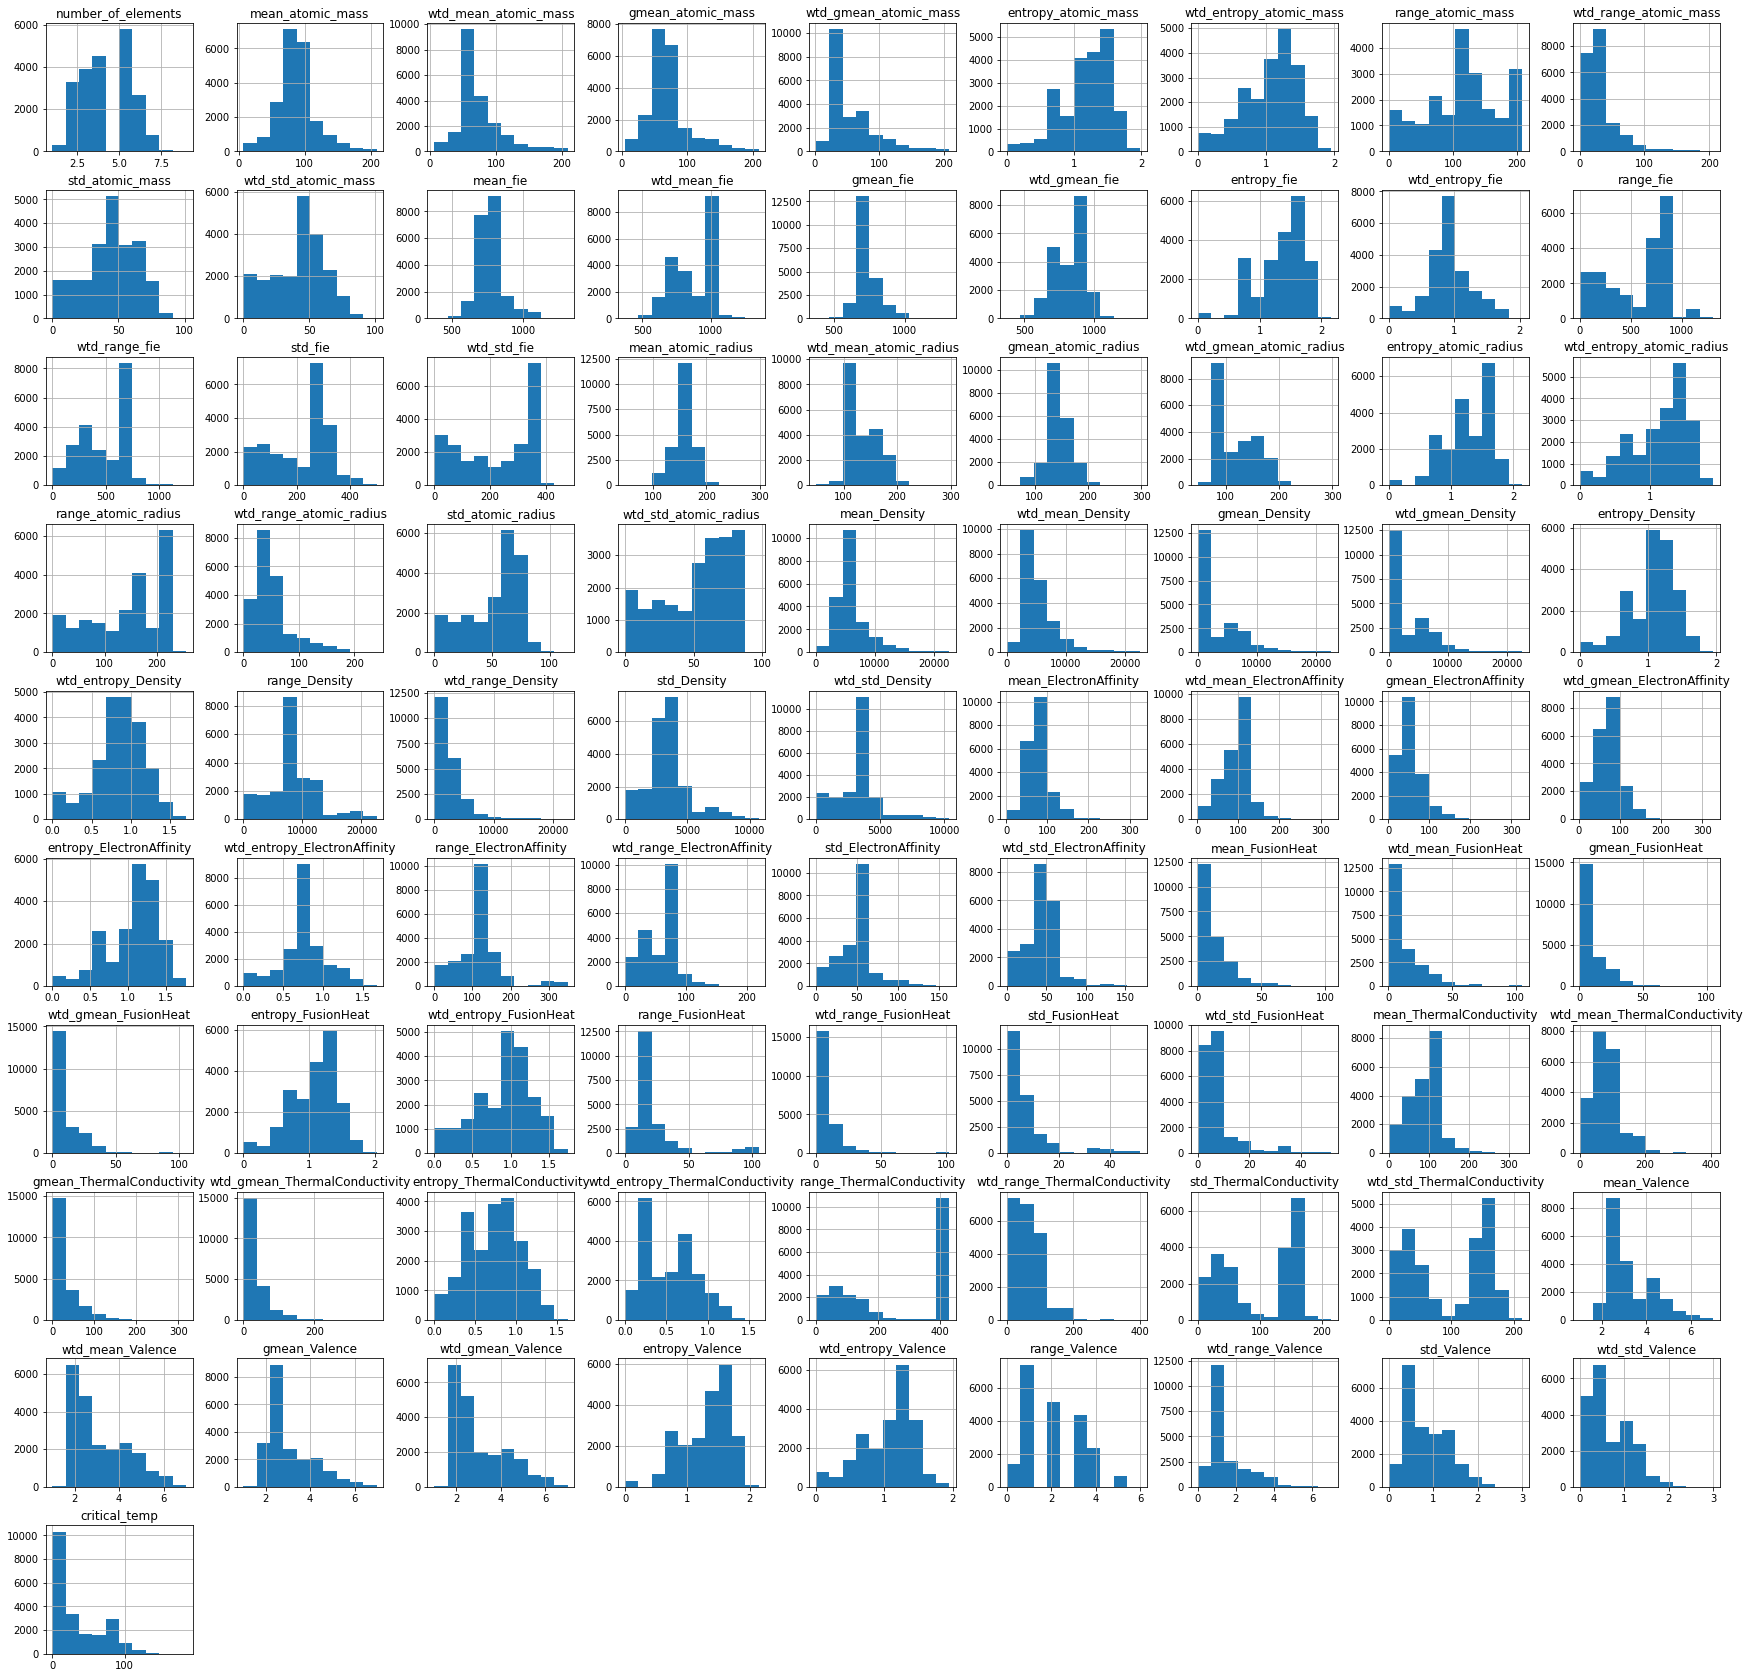

In [ ]:
dataset3.hist(figsize=(30,30))
plt.show()

The above **histogram** shows distribution of values

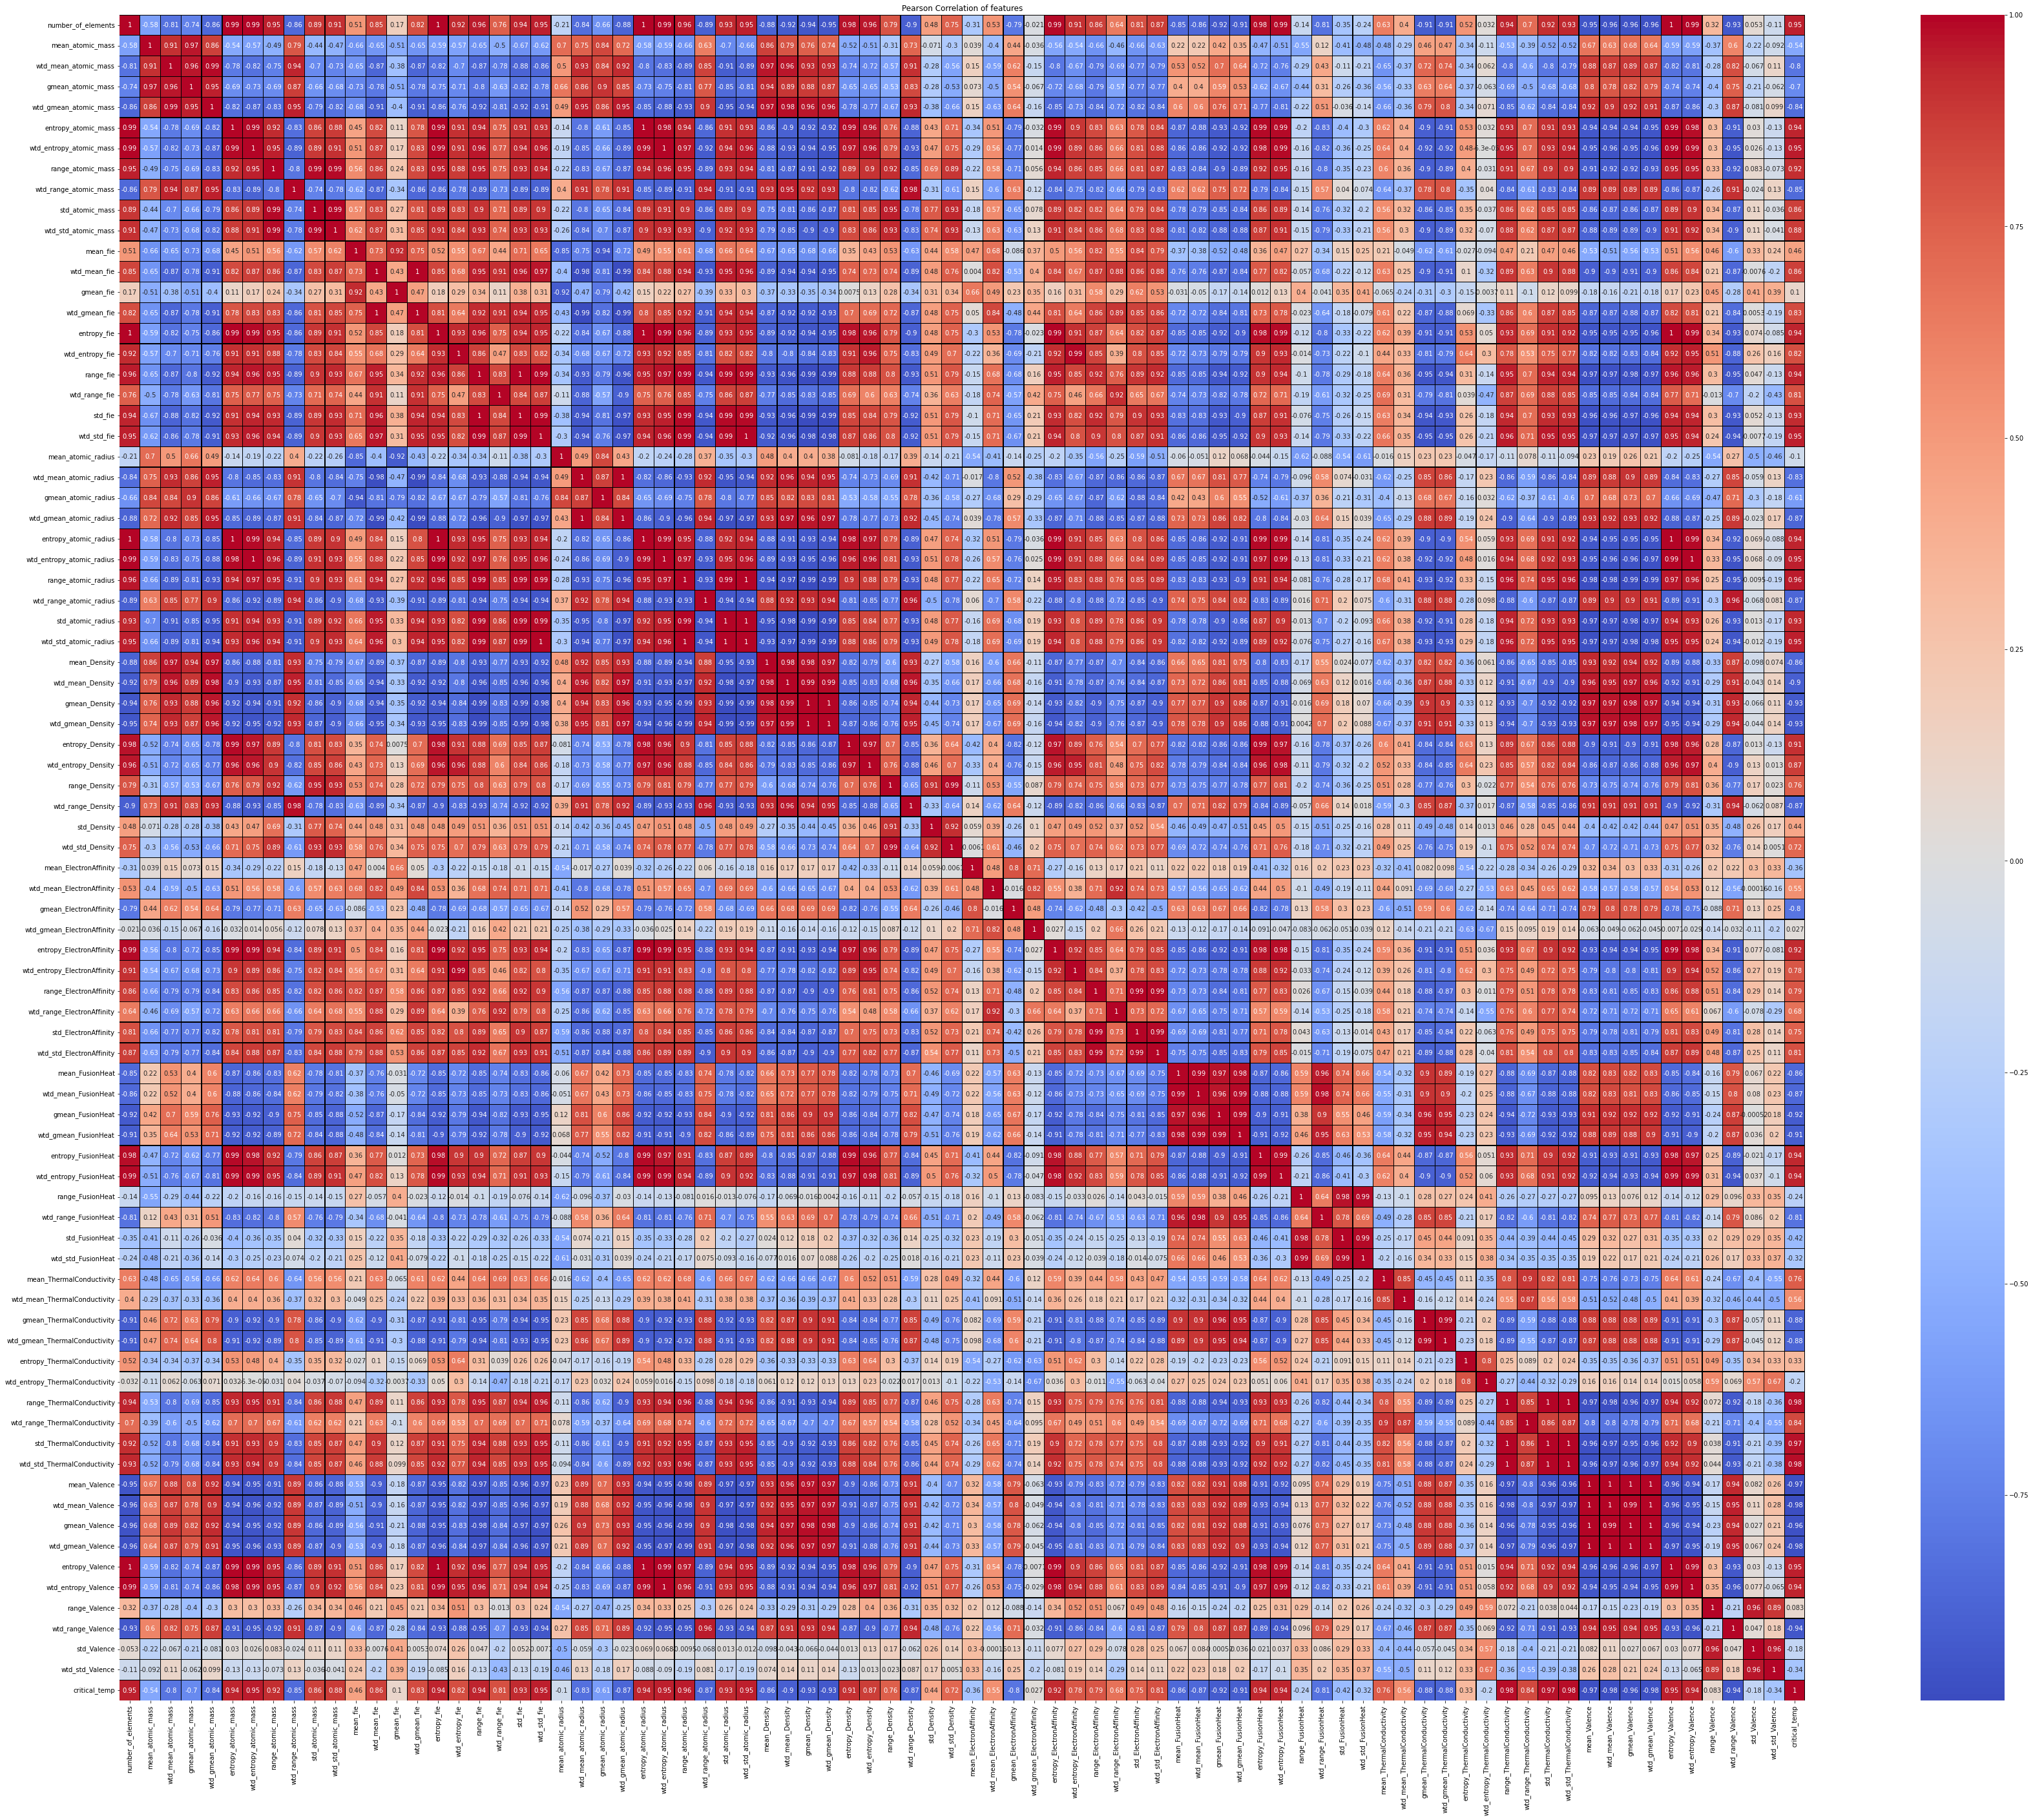

In [ ]:
corr_data = dataset3.corr()
       
f, ax = plt.subplots(figsize=(64, 48))
plt.title('Pearson Correlation of features')
sns.heatmap(corr_data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="coolwarm", linecolor='k', annot=True)

Many features seem to show a good correlation with **critical temp**

### **`Stage 2: Traditional ML (Applying ML Models)`**

In [ ]:
# spliiting data into train test splits
X = dataset3.iloc[:, :-1].values
y = dataset3.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
regression_models(X_train, X_test, y_train, y_test)


--> (a) Model: Linear Regression

--> Evaluation Metrics
r2-score:	 0.7386576626075259
MSE:	 307.3261479078039
RMSE:	 17.5307201194875


--> (b) Model: VotingRegressor Regression

--> Evaluation Metrics
r2-score:	 0.6291165310288468
MSE:	 436.14130407969003
RMSE:	 20.883996362758015


Linear Regression show better results with **~74% r2-score** and **~307 MSE**

In [ ]:
# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=10)
# learn relationship from training data
fs.fit(X_train, y_train)

scores = pd.DataFrame(fs.scores_)
features = pd.DataFrame(dataset3.iloc[:, :-1].columns) 
featureScores = pd.concat([features,scores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(5,'Score'))  

                        Feature         Score
70  wtd_std_ThermalConductivity  16209.404194
67    range_ThermalConductivity  13393.708830
27          range_atomic_radius  11111.532409
69      std_ThermalConductivity  11100.040065
72             wtd_mean_Valence   9918.141857


By using **f_regression** feature selection method, top **5 best features** were picked. Out of these, I will pick two most important features for MCMC method

### **`Stage 3: Bayesian Inference Methods (MCMC)`**

In [ ]:
y_mcmc_data = dataset3['critical_temp'].values
x_features = ['wtd_std_ThermalConductivity','range_ThermalConductivity']
x_mcmc_data = dataset3[x_features].values
x_mean = x_mcmc_data.mean(axis=0)
x_c = x_mcmc_data - x_mean

In [ ]:
print('splitting data into data and labels and training and testing...\n')
X_train, X_test, y_train, y_test = train_test_split(x_c, y_mcmc_data, test_size=0.3, random_state=0)

splitting data into data and labels and training and testing...



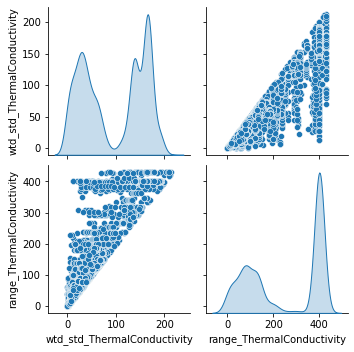

In [ ]:
sns.pairplot(dataset3[x_features], diag_kind='kde')

**Model Parameters**


In [ ]:
with pm.Model() as model_ln:
  # define prior
  alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10)
  beta = pm.Normal('beta', mu=0, sd=1, shape=2)
  epsilon = pm.HalfCauchy('epsilon', 5)
  x_t = pm.Data('input_cols', X_train)
  mu = alpha_tmp + pm.math.dot(x_t, beta)
  alpha = pm.Deterministic('alpha', alpha_tmp - pm.math.dot(x_mean, beta))

  # define likelihood
  yl = pm.Normal('yl', mu=mu, sd=epsilon, observed=y_train)
  trace_ln = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon, beta, alpha_tmp]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 95 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f686266f450>,
      dtype=object)

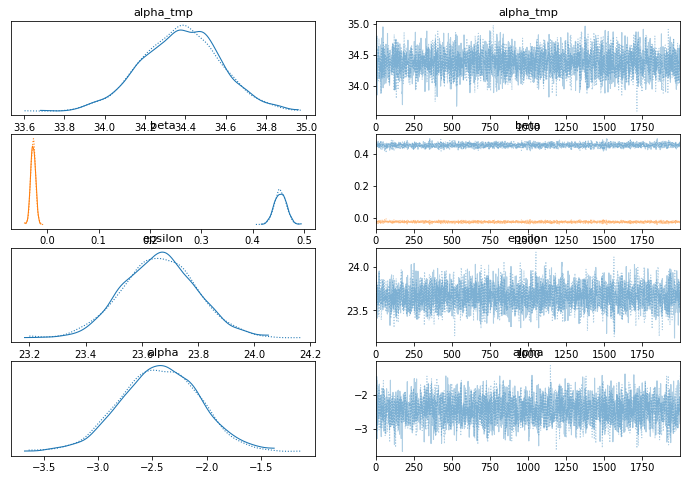

In [ ]:
# model_params = ['alpha','beta','bd']
az.plot_trace(trace_ln)

**trace plot** is used to check for the convergence of MCMC. We can see Kernel Density Estimation (KDE) on the left and on the right, we can see individual sampled values at each step. 

In [ ]:
az.summary(trace_ln)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  ...  mcse_sd  ess_bulk  ess_tail  r_hat
alpha_tmp  34.378  0.193  34.001   34.736  ...    0.002    3133.0    2255.0    1.0
beta[0]     0.454  0.012   0.433    0.476  ...    0.000    1981.0    1921.0    1.0
beta[1]    -0.027  0.005  -0.036   -0.018  ...    0.000    2011.0    2066.0    1.0
epsilon    23.662  0.132  23.412   23.908  ...    0.002    2820.0    2205.0    1.0
alpha      -2.432  0.358  -3.104   -1.773  ...    0.004    3397.0    3346.0    1.0

[5 rows x 9 columns]

We can also see the above summary visually by generating a plot with the mean and Highest Posterior Density (HPD) of a distribution, and to interpret and report the results of a Bayesian inference.

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f686a9dfb50>,
      dtype=object)

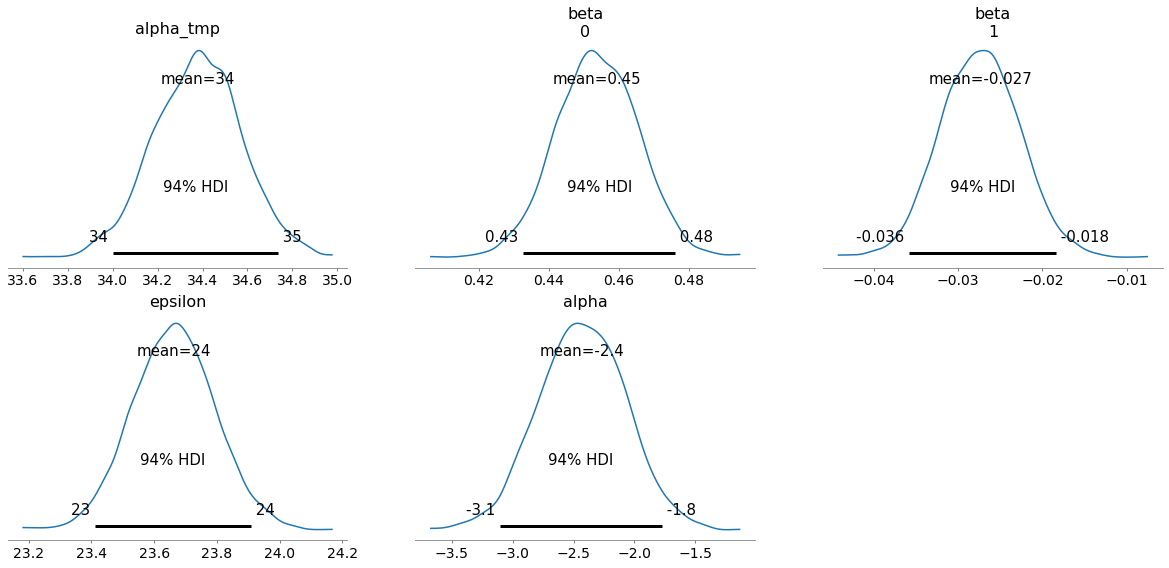

In [ ]:
az.plot_posterior(trace_ln)

In [ ]:
az.rhat(trace_ln)

Got error No model on context stack. trying to find log_likelihood in translation.


<xarray.Dataset>
Dimensions:     (beta_dim_0: 2)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1
Data variables:
    alpha_tmp   float64 0.9999
    beta        (beta_dim_0) float64 1.002 1.001
    epsilon     float64 1.0
    alpha       float64 1.0

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


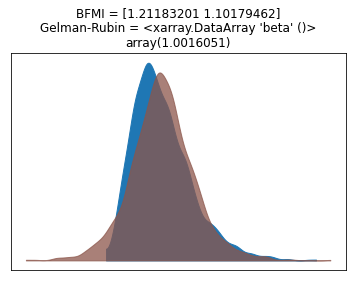

In [ ]:
bfmi = pm.bfmi(trace_ln)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_ln).values())
(pm.energyplot(trace_ln, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

**The Gelman Rubin** graph shows that our results have converged quite well as the statistics looks fine

**Posterior Predictive Checks**

*   PPCs are used to validate a model. The idea is to generate data from the model using parameters from draws from the posterior.
*   After computing posterior, we will now illustrate how simulation results can derive predictions
* prediction will be generated from test data which is unseen. This is done to compare with conventional ML technqiue

In [ ]:
X_test_df = pd.DataFrame(X_test)
with model_ln:
  pm.set_data({'input_cols': X_test_df})
  posterior = pm.sample_posterior_predictive(trace_ln)

preds = posterior['yl'].mean(axis=0)
ppc = pm.sample_posterior_predictive(trace_ln, model=model_ln, samples=1000)
y_pred = np.rint(ppc['yl'].mean(axis=0)).astype('int')

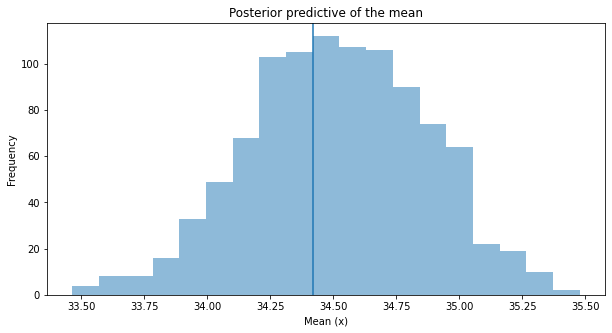

In [ ]:

_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['yl']], bins=19, alpha=0.5)
ax.axvline(dataset3.critical_temp.mean())
ax.set(title='Posterior predictive of the mean', xlabel='Mean (x)', ylabel='Frequency');

It is visible from the plot above that our posterior mean aligns closely to our actual mean

**Evaluation of MCMC results**

In [ ]:
y_prediction = posterior['yl'].mean(axis=0)
score=r2_score(y_test,y_prediction)
print('r2-score:\t', score)
print('MSE:\t', mean_squared_error(y_test,y_prediction))
print('RMSE:\t', np.sqrt(mean_squared_error(y_test,y_prediction)))


r2-score:	 0.5185335432432641
MSE:	 566.1816335546706
RMSE:	 23.79457151441628


We got r2-score of ~0.52 with just two features

### **`Stage 4: Comparison of Both Methods`**

MSE and RMSE is considerable, provided that we just used two features. But overall it did not produce very good results even after converging well

# **Conclusion**

---

*   If I look at the less number of features that MCMC algorithm has used so it is clearly visible that MCMC performed well
*   MCMC methods are better in my opinion where there is a high chance of uncertainity in the data as it works on estimating distribution of those uncertainities of the parameters
*   The best part is we actually got prediction without fitting data to any model instead we produced it via probabilistic sampling
*   It provides a natural way of utilizing prior information with data and utilizing past information as well for obtaining distribution of future analysis
*   A disadvantage of MCMC is that it does not tell us how to select prior and it requires alot of skill to formulate mathematical interpretation of information.
*   Also the computation complexity of working with MCMC method is very high
